In [154]:
##### import os
import pandas as pd
import numpy as np
from astropy import units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
%matplotlib widget
import scipy

### old version spectral index (2022 April)
#specind = pd.read_csv('/Users/87steven/Documents/ASIAA/Blazar SED progress/spectral index for statistic.csv')

### new version spectral index (2022 Nov)
### Use "SED statistical analysis important-Copy1.ipynb" to run new version statistic
#specind = pd.read_csv('/Users/87steven/Documents/ASIAA/Blazar SED progress/spectral index for statistic 9_21.csv')
specind = pd.read_csv('/Users/87steven/Documents/ASIAA/Blazar SED progress/spectral index New 2022_10_18.csv')

Name = specind.Name
#RA = specind.RA
#DEC = specind.DEC
z = specind.z
cla = specind.class_name
alpha = specind.alpha
alphaRad = specind.alphaRad
alphaK = specind.alphaK
alphaRadK = specind.alphaRadK
#######################################################################################################
alpha[np.isnan(alphaRad)] = np.nan 
alphaK[np.isnan(alphaRadK)] = np.nan 

#######################################################################################################
classnameall = []
QSOind = []
BL_Lac_can_ind = []
BL_Lac_galaxy_dom_ind = []
BL_Lac_ind = []
Blazar_ind = []
classclassify = [Blazar_ind, BL_Lac_can_ind, BL_Lac_galaxy_dom_ind, QSOind, BL_Lac_ind]
classnameall  = [' Blazar Uncertain type', ' BL Lac Candidate', ' BL Lac-galaxy dominated', ' QSO RLoud flat radio sp.', ' BL Lac']
    
for j in range(0, 5): # 1367
    classclassify[j] = np.where( cla == classnameall[j] )[0]
        
#######################################################################################################
z = np.array(z)

z1 = np.where((0 < z) & (z < 1))[0]
z2 = np.where((z >= 1) & (z < 2))[0]
z3 = np.where(z >= 2)[0]
z4 = np.where((0 < z) & (z < 1.5))[0]
z5 = np.where(z >= 1.5)[0]

zsep = [z1, z2, z3, z4, z5]

zsepname = ['0<z<1, N = '+str(len(z1)), '1$\leq$z<2, N = '+str(len(z2)), 'z$\geq$2, N = '+str(len(z3)), '0<z<1.5, N = '+str(len(z4)), 'z$\geq$1.5, N = '+str(len(z5))]

#######################################################################################################
inter = [0 , 1.5 , 4]
color = ['red', 'green', 'blue', 'black', 'orange']

#######################################################################################################
### define statistical test fumction
## T-test
def t_test(group1, group2):
    if (len(group1)>len(group2) and np.nanvar(group1)/np.nanvar(group2)<4) or \
    (len(group2)>len(group1) and np.nanvar(group2)/np.nanvar(group1)<4) or \
    (len(group2) == len(group1) and np.nanvar(group2)/np.nanvar(group1)<4): 
        sta, p = scipy.stats.ttest_ind(group1, group2, equal_var = True, nan_policy = 'omit')
    else: 
        sta, p = scipy.stats.ttest_ind(group1, group2, equal_var = False, nan_policy = 'omit')
    
    return sta, p

## F-test  
def f_test(group1, group2):
    sta = np.nanvar(group1, ddof=1)/np.nanvar(group2, ddof=1)
    nun = group1.size-1
    dun = group1.size-1
    p = 1-scipy.stats.f.cdf(sta, nun, dun)
    
    return sta, p


/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_56252/3875153221.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alpha[np.isnan(alphaRad)] = np.nan
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_56252/3875153221.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alphaK[np.isnan(alphaRadK)] = np.nan


In [ ]:
### Radio-mm Spectral Index
BL_Lac = np.hstack([np.array(alpha[classclassify[1]]), np.array(alpha[classclassify[2]]), np.array(alpha[classclassify[4]])])
BL_Lac = BL_Lac[~np.isnan(BL_Lac)]
QSO = np.array(alpha[classclassify[3]])
QSO = QSO[~np.isnan(QSO)]

sta_ks, p_ks = stats.ks_2samp(BL_Lac, QSO)
sta_t, p_t = t_test(BL_Lac, QSO)
sta_f, p_f = f_test(BL_Lac, QSO)

BL_Lac_med = np.median(BL_Lac)
QSO_med = np.median(QSO)

BL_Lac_mean = np.mean(BL_Lac)
QSO_mean = np.mean(QSO)

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

n, bins, p = plt.hist(BL_Lac, bins = np.arange(0., max(BL_Lac) +0.1, 0.1), density=True,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = 'BL Lac, N = '+str(len(BL_Lac)))
# set maxximum value of y-axis = 1
for item in p:
    item.set_height(item.get_height()/sum(n))
n, bins, p = plt.hist(QSO, bins = np.arange(0., max(QSO) +0.1, 0.1), density=True,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = 'QSO, N = '+str(len(QSO)))
for item in p:
    item.set_height(item.get_height()/sum(n))

plt.axvline(BL_Lac_med, color = 'red', linestyle = 'dashed', linewidth = 2, label = 'BL Lac median = %4.2f' %(BL_Lac_med))
plt.axvline(BL_Lac_mean, color = 'red', linestyle = '-.', linewidth = 2, label = 'BL Lac mean = %4.2f$\pm$%4.2f' %(BL_Lac_mean, np.std(BL_Lac)))
plt.axvline(QSO_med, color = 'blue', linestyle = 'dashed', linewidth = 2, label = 'QSO median = %4.2f' %(QSO_med))
plt.axvline(QSO_mean, color = 'blue', linestyle = '-.', linewidth = 2, label = 'QSO mean = %4.2f$\pm$%4.2f' %(QSO_mean, np.std(QSO)))
    
ax.set_xlim(0., 1.5)
ax.set_ylim(0, 1)   

#text = 
plt.text(0.05, 0.6, 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e, \
    \nF-test result: \n statistic = %6.4f,\n p-value = %.2e, \
    \nT-test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta_ks, p_ks, sta_f, p_f, sta_t, p_t), verticalalignment = 'top', fontsize = 14)
    
plt.grid(axis='y', alpha=0.75)
plt.xlabel('$\\alpha_\mathrm{radio-mm}$', fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('Normalized Count',  fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left', shadow=True,  fontsize = 12, markerscale = 2) 
figurename = 'BL Lac & QSO Radio-mm Spectral Index\n (before K-correction) Comparasion'
plt.title(figurename, fontsize = 18)

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#fig.savefig (plotname, dpi = 300)
#######################################################################################################
### Radio Spectral Index
BL_Lac = np.hstack([np.array(alphaRad[classclassify[1]]), np.array(alphaRad[classclassify[2]]), np.array(alphaRad[classclassify[4]])])
BL_Lac = BL_Lac[~np.isnan(BL_Lac)]
QSO = np.array(alphaRad[classclassify[3]])
QSO = QSO[~np.isnan(QSO)]

sta_ks, p_ks = stats.ks_2samp(BL_Lac, QSO)
sta_t, p_t = t_test(BL_Lac, QSO)
sta_f, p_f = f_test(BL_Lac, QSO)

BL_Lac_med = np.median(BL_Lac)
QSO_med = np.median(QSO)
BL_Lac_mean = np.mean(BL_Lac)
QSO_mean = np.mean(QSO)

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

n, bins, p = plt.hist(BL_Lac, bins = np.arange(0., max(BL_Lac) +0.1, 0.1), density = 1,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = 'BL Lac, N = '+str(len(BL_Lac)))
for item in p:
    item.set_height(item.get_height()/sum(n)) 
n, bins, p = plt.hist(QSO, bins = np.arange(0., max(QSO) +0.1, 0.1), density = 1, 
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = 'QSO, N = '+str(len(QSO)))
for item in p:
    item.set_height(item.get_height()/sum(n)) 
    
plt.axvline(BL_Lac_med, color = 'red', linestyle = 'dashed', linewidth = 2, label = 'BL Lac median = %4.2f' %(BL_Lac_med))
plt.axvline(BL_Lac_mean, color = 'red', linestyle = '-.', linewidth = 2, label = 'BL Lac mean = %4.2f$\pm$%4.2f' %(BL_Lac_mean, np.std(BL_Lac)))
plt.axvline(QSO_med, color = 'blue', linestyle = 'dashed', linewidth = 2, label = 'QSO median = %4.2f' %(QSO_med))
plt.axvline(QSO_mean, color = 'blue', linestyle = '-.', linewidth = 2, label = 'QSO mean = %4.2f$\pm$%4.2f' %(QSO_mean, np.std(QSO)))

ax.set_xlim (0., 1.5)
ax.set_ylim (0, 1)    

plt.text(0.05, 0.6, 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e, \
    \nF-test result: \n statistic = %6.4f,\n p-value = %.2e, \
    \nT-test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta_ks, p_ks, sta_f, p_f, sta_t, p_t), verticalalignment = 'top', fontsize = 14)
    
plt.grid(axis='y', alpha=0.75)
plt.xlabel('$\\alpha_\mathrm{radio}$',  fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('Normalized Count',  fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left', shadow=True, fontsize = 12, markerscale = 2) 
figurename = 'BL Lac & QSO  Radio Spectral Index\n (before K-correction) Comparasion'
plt.title(figurename, fontsize = 18)

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#fig.savefig (plotname, dpi = 300)

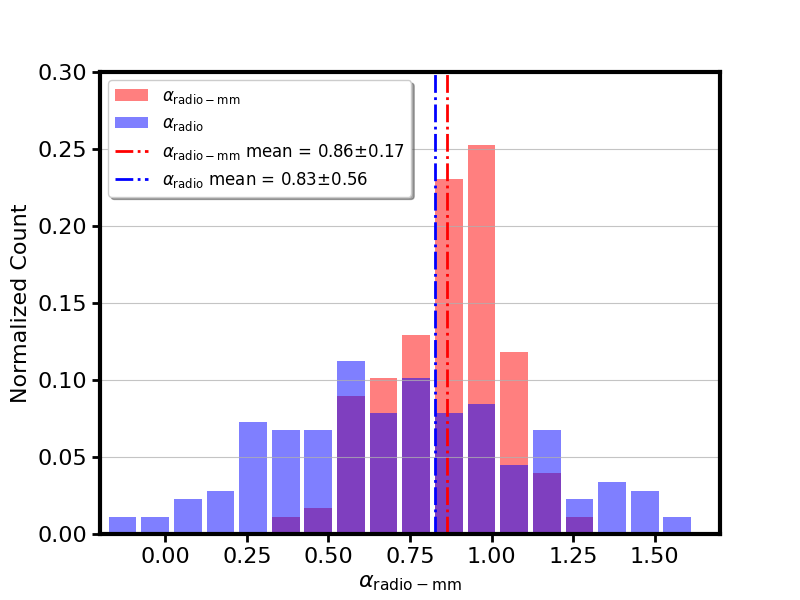

In [156]:
### BL Lac Radio and Radio-mm Spectral Index
# Radio-mm 
BL_Lac_radio_mm = np.hstack([np.array(alphaK[classclassify[1]]), np.array(alphaK[classclassify[2]]), np.array(alphaK[classclassify[4]])])
BL_Lac = BL_Lac[~np.isnan(BL_Lac)]

# Radio
BL_Lac_radio = np.hstack([np.array(alphaRadK[classclassify[1]]), np.array(alphaRadK[classclassify[2]]), np.array(alphaRadK[classclassify[4]])])
BL_Lac = BL_Lac[~np.isnan(BL_Lac)]

sta_ks, p_ks = stats.ks_2samp(BL_Lac_radio_mm, BL_Lac_radio)
sta_t, p_t = t_test(BL_Lac_radio_mm, BL_Lac_radio)
sta_f, p_f = f_test(BL_Lac_radio_mm, BL_Lac_radio)

BL_Lac_radio_mm_med = np.nanmedian(BL_Lac_radio_mm)
BL_Lac_radio_med = np.nanmedian(BL_Lac_radio)
BL_Lac_radio_mm_mean = np.nanmean(BL_Lac_radio_mm)
BL_Lac_radio_mean = np.nanmean(BL_Lac_radio)

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

n, bins, p = plt.hist(BL_Lac_radio_mm, bins = np.arange(np.nanmin(BL_Lac_radio), np.nanmax(BL_Lac_radio_mm)+0.1, 0.1), density = 1,
                                color = 'red', alpha = 0.5, rwidth = 0.85, label = '$\\alpha_\mathrm{radio-mm}$')
for item in p:
    item.set_height(item.get_height()/sum(n)) 
    
n, bins, p = plt.hist(BL_Lac_radio, bins = np.arange(np.nanmin(BL_Lac_radio), np.nanmax(BL_Lac_radio)+0.1, 0.1), density = 1,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = '$\\alpha_\mathrm{radio}$')
for item in p:
    item.set_height(item.get_height()/sum(n)) 

#plt.axvline(BL_Lac_radio_mm_med, color = 'red', linestyle = 'dashed', linewidth = 2, label = '$\\alpha_\mathrm{radio-mm}$ median = %4.2f' %(BL_Lac_radio_mm_med))
plt.axvline(BL_Lac_radio_mm_mean, color = 'red', linestyle = '-.', linewidth = 2, label = '$\\alpha_\mathrm{radio-mm}$ mean = %4.2f$\pm$%4.2f' %(BL_Lac_radio_mm_mean, np.nanstd(BL_Lac_radio_mm)))
#plt.axvline(BL_Lac_radio_med, color = 'blue', linestyle = 'dashed', linewidth = 2, label = '$\\alpha_\mathrm{radio}$ = %4.2f' %(BL_Lac_radio_med))
plt.axvline(BL_Lac_radio_mean, color = 'blue', linestyle = '-.', linewidth = 2, label = '$\\alpha_\mathrm{radio}$ mean = %4.2f$\pm$%4.2f' %(BL_Lac_radio_mean, np.nanstd(BL_Lac_radio)))

ax.set_xlim (-0.2, 1.7)
ax.set_ylim (0, 0.3)    

#plt.text(0.1, 0.5, 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e, \
#    \nF-test result: \n statistic = %6.4f,\n p-value = %.2e, \
#    \nT-test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta_ks, p_ks, sta_f, p_f, sta_t, p_t), verticalalignment = 'top', fontsize = 12)
    
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('$\\alpha_\mathrm{radio-mm}$', fontsize = 16)
plt.xticks(fontsize = 16)
plt.ylabel('Normalized Count', fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc = 'upper left', shadow = True,  fontsize = 12, markerscale = 2, ncol = 1) 

#plt.savefig('/Users/87steven/Documents/天文所/Master Thesis/figures/chapter 4/Spectral index/BL Lac Objects Radio & Radio-mm spectral index.pdf', bbox_inches = 'tight')


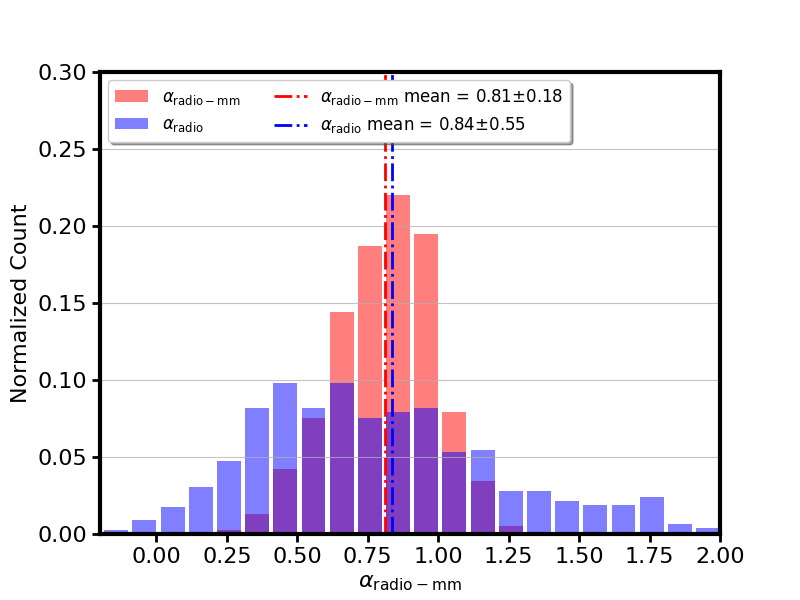

In [157]:
### QSO Radio and Radio-mm Spectral Index
# Radio-mm 
QSO_radio_mm = alphaK[classclassify[3]]
QSO = QSO[~np.isnan(QSO)]

# Radio
QSO_radio = alphaRadK[classclassify[3]]
QSO = QSO[~np.isnan(QSO)]

sta_ks, p_ks = stats.ks_2samp(QSO_radio_mm, QSO_radio)
sta_t, p_t = t_test(QSO_radio_mm, QSO_radio)
sta_f, p_f = f_test(QSO_radio_mm, QSO_radio)

QSO_radio_mm_med = np.nanmedian(QSO_radio_mm)
QSO_radio_med = np.nanmedian(QSO_radio)
QSO_radio_mm_mean = np.nanmean(QSO_radio_mm)
QSO_radio_mean = np.nanmean(QSO_radio)

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

n, bins, p = plt.hist(QSO_radio_mm, bins = np.arange(np.nanmin(QSO_radio), np.nanmax(QSO_radio_mm)+0.1, 0.1), density = 1,
                                color = 'red', alpha = 0.5, rwidth = 0.85, label = '$\\alpha_\mathrm{radio-mm}$')
for item in p:
    item.set_height(item.get_height()/sum(n)) 
    
n, bins, p = plt.hist(QSO_radio, bins = np.arange(np.nanmin(QSO_radio), np.nanmax(QSO_radio)+0.1, 0.1), density = 1,
                                color = 'blue', alpha = 0.5, rwidth = 0.85, label = '$\\alpha_\mathrm{radio}$')
for item in p:
    item.set_height(item.get_height()/sum(n)) 

#plt.axvline(QSO_radio_mm_med, color = 'red', linestyle = 'dashed', linewidth = 2, label = '$\\alpha_\mathrm{radio-mm}$ median = %4.2f' %(QSO_radio_mm_med))
plt.axvline(QSO_radio_mm_mean, color = 'red', linestyle = '-.', linewidth = 2, label = '$\\alpha_\mathrm{radio-mm}$ mean = %4.2f$\pm$%4.2f' %(QSO_radio_mm_mean, np.nanstd(QSO_radio_mm)))
#plt.axvline(QSO_radio_med, color = 'blue', linestyle = 'dashed', linewidth = 2, label = '$\\alpha_\mathrm{radio}$ median = %4.2f' %(QSO_radio_med))
plt.axvline(QSO_radio_mean, color = 'blue', linestyle = '-.', linewidth = 2, label = '$\\alpha_\mathrm{radio}$ mean = %4.2f$\pm$%4.2f' %(QSO_radio_mean, np.nanstd(QSO_radio)))

ax.set_xlim (-0.2, 2.0)
ax.set_ylim (0, 0.3)    

# plt.text(0.1, 0.5, 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e, \
#     \nF-test result: \n statistic = %6.4f,\n p-value = %.2e, \
#     \nT-test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta_ks, p_ks, sta_f, p_f, sta_t, p_t), verticalalignment = 'top', fontsize = 12)
    
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('$\\alpha_\mathrm{radio-mm}$', fontsize = 16)
plt.xticks(fontsize = 16)
plt.ylabel('Normalized Count', fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc = 'upper left', shadow = True,  fontsize = 12, markerscale = 2, ncol = 2) 

plt.savefig('/Users/87steven/Documents/天文所/Master Thesis/figures/chapter 4/Spectral index/FSRQ Radio & Radio-mm spectral index.pdf', bbox_inches = 'tight')


In [197]:
len(QSO_radio_mm[~np.isnan(QSO_radio_mm)])

785

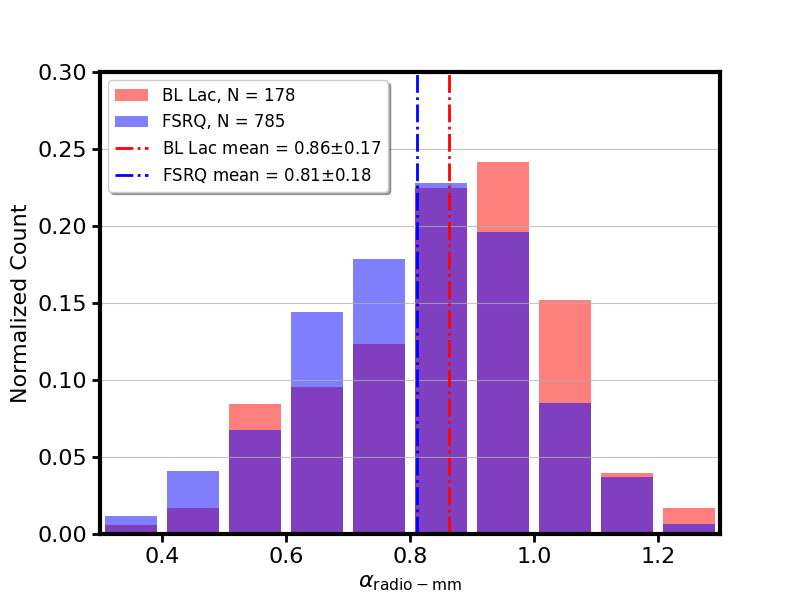

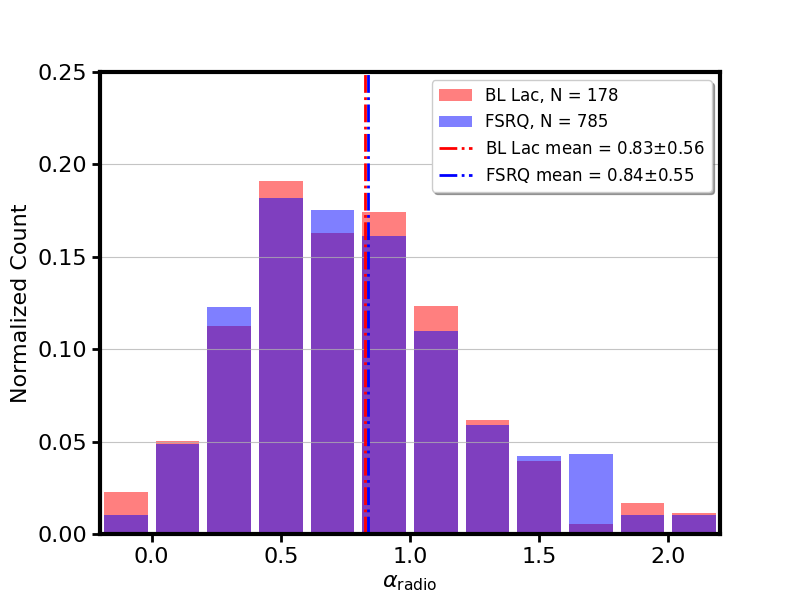

In [163]:
### Radio-mm Spectral Index
BL_Lac = np.hstack([np.array(alphaK[classclassify[1]]), np.array(alphaK[classclassify[2]]), np.array(alphaK[classclassify[4]])])
BL_Lac = BL_Lac[~np.isnan(BL_Lac)]
QSO = np.array(alphaK[classclassify[3]])
QSO = QSO[~np.isnan(QSO)]

sta_ks, p_ks = stats.ks_2samp(BL_Lac, QSO)
sta_t, p_t = t_test(BL_Lac, QSO)
sta_f, p_f = f_test(BL_Lac, QSO)

BL_Lac_med = np.median(BL_Lac)
QSO_med = np.median(QSO)
BL_Lac_mean = np.mean(BL_Lac)
QSO_mean = np.mean(QSO)

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

n, bins, p = plt.hist(BL_Lac, bins = np.arange(-0.2, max(BL_Lac) +0.1, 0.1), density = 1,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = 'BL Lac, N = '+str(len(BL_Lac)))
for item in p:
    item.set_height(item.get_height()/sum(n)) 
    
n, bins, p = plt.hist(QSO, bins = np.arange(-0.2, max(QSO) +0.1, 0.1), density = 1,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = 'FSRQ, N = '+str(len(QSO)))
for item in p:
    item.set_height(item.get_height()/sum(n)) 

#plt.axvline(BL_Lac_med, color = 'red', linestyle = 'dashed', linewidth = 2, label = 'BL_Lac median = %4.2f' %(BL_Lac_med))
plt.axvline(BL_Lac_mean, color = 'red', linestyle = '-.', linewidth = 2, label = 'BL Lac mean = %4.2f$\pm$%4.2f' %(BL_Lac_mean, np.std(BL_Lac)))
#plt.axvline(QSO_med, color = 'blue', linestyle = 'dashed', linewidth = 2, label = 'QSO median = %4.2f' %(QSO_med))
plt.axvline(QSO_mean, color = 'blue', linestyle = '-.', linewidth = 2, label = 'FSRQ mean = %4.2f$\pm$%4.2f' %(QSO_mean, np.std(QSO)))

ax.set_xlim (0.3, 1.3)
ax.set_ylim (0, 0.3)    

# plt.text(0.35, 0.6, 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e, \
#     \nF-test result: \n statistic = %6.4f,\n p-value = %.2e, \
#     \nT-test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta_ks, p_ks, sta_f, p_f, sta_t, p_t), verticalalignment = 'top', fontsize = 12)
    
plt.grid(axis='y', alpha=0.75)
plt.xlabel('$\\alpha_\mathrm{radio-mm}$', fontsize = 16)
plt.xticks(fontsize = 16)
plt.ylabel('Normalized Count', fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc = 'upper left', shadow = True,  fontsize = 12, markerscale = 2) 
# figurename = 'BL Lac & QSO Radio-mm Spectral Index \nComparasion (K-corrected)'
# plt.title(figurename, fontsize = 18)

plt.savefig('/Users/87steven/Documents/天文所/Master Thesis/figures/chapter 4/Spectral index/BL Lac & FSRQ Radio-mm Spectral Index Comparasion.pdf', bbox_inches = 'tight')

#######################################################################################################
### Radio Spectral Index
#######################################################################################################
BL_Lac = np.hstack([np.array(alphaRadK[classclassify[1]]), np.array(alphaRadK[classclassify[2]]), np.array(alphaRadK[classclassify[4]])])
BL_Lac = BL_Lac[~np.isnan(BL_Lac)]

QSO = np.array(alphaRadK[classclassify[3]])
QSO = QSO[~np.isnan(QSO)]

sta_ks, p_ks = stats.ks_2samp(BL_Lac, QSO)
sta_t, p_t = t_test(BL_Lac, QSO)
sta_f, p_f = f_test(BL_Lac, QSO)

BL_Lac_med = np.median(BL_Lac)
QSO_med = np.median(QSO)
BL_Lac_mean = np.mean(BL_Lac)
QSO_mean = np.mean(QSO)

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

n, bins, p = plt.hist(BL_Lac, bins = np.arange(-0.2, max(BL_Lac) +0.2, 0.2), density = 1,
                                color = 'red', alpha = 0.5, rwidth = 0.85, label = 'BL Lac, N = '+str(len(BL_Lac)))
for item in p:
    item.set_height(item.get_height()/sum(n)) 
n, bins, p = plt.hist(QSO, bins = np.arange(-0.2, max(QSO) +0.2, 0.2), density = 1,
                                color = 'blue', alpha = 0.5, rwidth = 0.85, label = 'FSRQ, N = '+str(len(QSO)))
for item in p:
    item.set_height(item.get_height()/sum(n)) 

#plt.axvline(BL_Lac_med, color = 'red', linestyle = 'dashed', linewidth = 2, label = 'BL_Lac median = %4.2f' %(BL_Lac_med))
plt.axvline(BL_Lac_mean, color = 'red', linestyle = '-.', linewidth = 2, label = 'BL Lac mean = %4.2f$\pm$%4.2f' %(BL_Lac_mean, np.std(BL_Lac)))
#plt.axvline(QSO_med, color = 'blue', linestyle = 'dashed', linewidth = 2, label = 'QSO median = %4.2f' %(QSO_med))
plt.axvline(QSO_mean, color = 'blue', linestyle = '-.', linewidth = 2, label = 'FSRQ mean = %4.2f$\pm$%4.2f' %(QSO_mean, np.std(QSO)))

ax.set_xlim (-0.2, 2.2)
ax.set_ylim (0, 0.25)    

# plt.text(0.1, 0.6, 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e, \
#     \nF-test result: \n statistic = %6.4f,\n p-value = %.2e, \
#     \nT-test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta_ks, p_ks, sta_f, p_f, sta_t, p_t), verticalalignment = 'top', fontsize = 12)
    
plt.grid(axis='y', alpha = 0.75)
plt.xlabel('$\\alpha_\mathrm{radio}$',  fontsize = 16)
plt.xticks(fontsize = 16)
plt.ylabel('Normalized Count',  fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc = 'upper right', shadow = True,  fontsize = 12, markerscale = 2) 
# figurename = 'BL Lac & QSO Radio Spectral Index \n Comparasion (K-corrected)'
# plt.title(figurename, fontsize = 18)

plt.savefig('/Users/87steven/Documents/天文所/Master Thesis/figures/chapter 4/Spectral index/BL Lac & FSRQ Radio Spectral Index Comparasion.pdf', bbox_inches = 'tight')


Text(0.5, 1.0, 'Radio Spectral Index (before K-correction)\n Distributed by z=1.5')

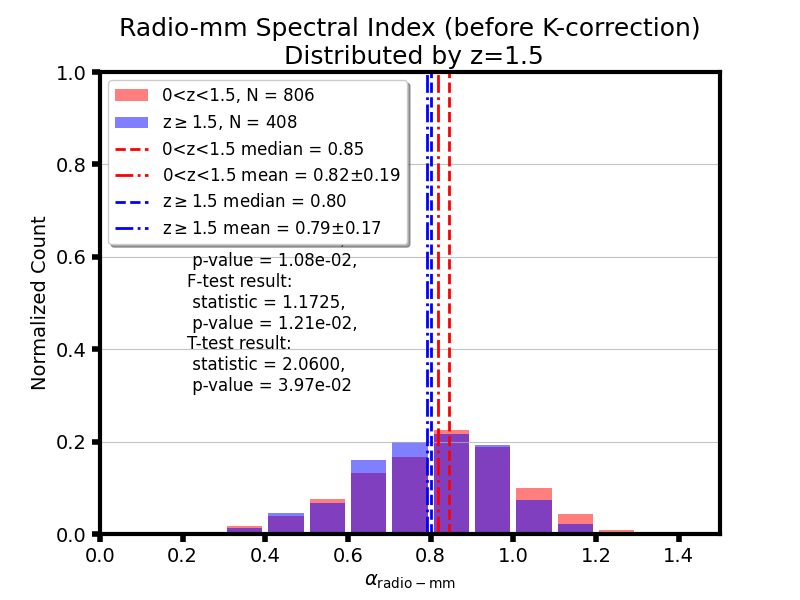

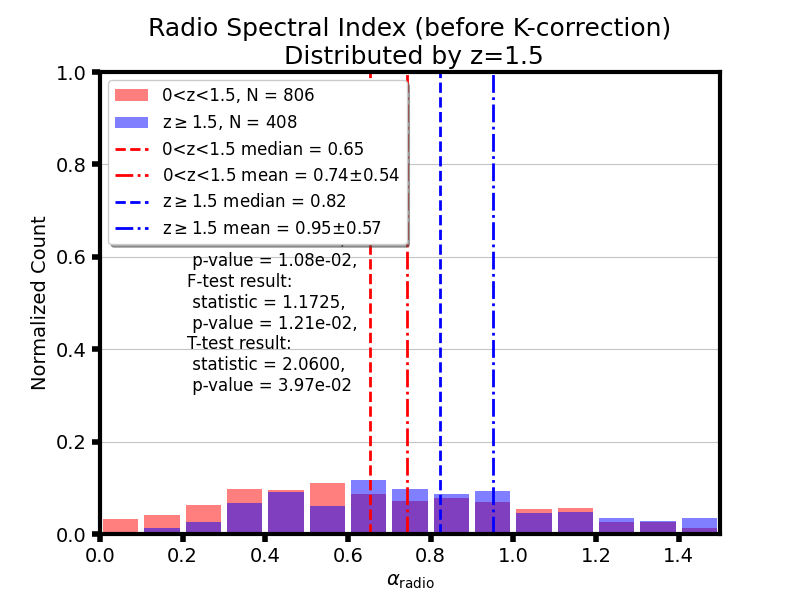

In [22]:
### Radio-mm Spectral Index
sta_ks, p_ks = stats.ks_2samp(alpha[zsep[3]], alpha[zsep[4]])
sta_t, p_t = t_test(alpha[zsep[3]], alpha[zsep[4]])
sta_f, p_f = f_test(alpha[zsep[3]], alpha[zsep[4]])

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['axes.linewidth'] = 3

z3 = alpha[zsep[3]]
z3 = z3[~np.isnan(z3)]
z4 = alpha[zsep[4]]
z4 = z4[~np.isnan(z4)]

z3_med = np.median(z3)
z4_med = np.median(z4)
z3_mean = np.mean(z3)
z4_mean = np.mean(z4)
    
fig, ax = plt.subplots()

n, bins, p = plt.hist(alpha[zsep[3]], bins = np.arange(0., np.nanmax(alpha[zsep[3]]) +0.1, 0.1), density = 1,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = zsepname[3])
for item in p:
    item.set_height(item.get_height()/sum(n)) 
n, bins, p = plt.hist(alpha[zsep[4]], bins = np.arange(0., np.nanmax(alpha[zsep[4]]) +0.1, 0.1), density = 1,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = zsepname[4])
for item in p:
    item.set_height(item.get_height()/sum(n)) 

plt.axvline(z3_med, color = 'red', linestyle = 'dashed', linewidth = 2, label = '0<z<1.5 median = %4.2f' %(z3_med))
plt.axvline(z3_mean, color = 'red', linestyle = '-.', linewidth = 2, label = '0<z<1.5 mean = %4.2f$\pm$%4.2f' %(z3_mean, np.std(z3)))
plt.axvline(z4_med, color = 'blue', linestyle = 'dashed', linewidth = 2, label = 'z$\geq$1.5 median = %4.2f' %(z4_med))
plt.axvline(z4_mean, color = 'blue', linestyle = '-.', linewidth = 2, label = 'z$\geq$1.5 mean = %4.2f$\pm$%4.2f' %(z4_mean, np.std(z4)))

ax.set_xlim (0., 1.5)
ax.set_ylim (0, 1)    

plt.text(0.21, 0.7, 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e, \
    \nF-test result: \n statistic = %6.4f,\n p-value = %.2e, \
    \nT-test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta_ks, p_ks, sta_f, p_f, sta_t, p_t), verticalalignment = 'top', fontsize = 12)
    
plt.grid(axis='y', alpha = 0.75)
plt.xlabel('$\\alpha_\mathrm{radio-mm}$', fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('Normalized Count', fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left', shadow=True,  fontsize = 12, markerscale = 2) 
figurename = 'Radio-mm Spectral Index (before K-correction)\n Distributed by z=1.5'
plt.title(figurename, fontsize = 18)

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#fig.savefig (plotname, dpi = 300)
#######################################################################################################
### Radio Spectral Index
sta_ks, pvalue_ks = stats.ks_2samp(alphaRad[zsep[3]], alphaRad[zsep[4]])
sta_t, p_t = t_test(alpha[zsep[3]], alpha[zsep[4]])
sta_f, p_f = f_test(alpha[zsep[3]], alpha[zsep[4]])

z3 = alphaRad[zsep[3]]
z3 = z3[~np.isnan(z3)]
z4 = alphaRad[zsep[4]]
z4 = z4[~np.isnan(z4)]

z3_med = np.median(z3)
z4_med = np.median(z4)
z3_mean = np.mean(z3)
z4_mean = np.mean(z4)

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

n, bins, p = plt.hist(alphaRad[zsep[3]], bins = np.arange(0., np.nanmax(alphaRad[zsep[3]])+0.1, 0.1), density = 1,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = zsepname[3])
for item in p:
    item.set_height(item.get_height()/sum(n)) 
n, bins, p = plt.hist(alphaRad[zsep[4]], bins = np.arange(0., np.nanmax(alphaRad[zsep[4]])+0.1, 0.1), density = 1,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = zsepname[4])
for item in p:
    item.set_height(item.get_height()/sum(n)) 
    
plt.axvline(z3_med, color = 'red', linestyle = 'dashed', linewidth = 2, label = '0<z<1.5 median = %4.2f' %(z3_med))
plt.axvline(z3_mean, color = 'red', linestyle = '-.', linewidth = 2, label = '0<z<1.5 mean = %4.2f$\pm$%4.2f' %(z3_mean, np.std(z3)))
plt.axvline(z4_med, color = 'blue', linestyle = 'dashed', linewidth = 2, label = 'z$\geq$1.5 median = %4.2f' %(z4_med))
plt.axvline(z4_mean, color = 'blue', linestyle = '-.', linewidth = 2, label = 'z$\geq$1.5 mean = %4.2f$\pm$%4.2f' %(z4_mean, np.std(z4)))

ax.set_xlim (0., 1.5)
ax.set_ylim (0, 1)    

plt.text(0.21, 0.7, 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e, \
    \nF-test result: \n statistic = %6.4f,\n p-value = %.2e, \
    \nT-test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta_ks, p_ks, sta_f, p_f, sta_t, p_t), verticalalignment = 'top', fontsize = 12)
    
plt.grid(axis='y', alpha=0.75)
plt.xlabel('$\\alpha_\mathrm{radio}$', fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('Normalized Count', fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left', shadow=True,  fontsize = 12, markerscale = 2) 
figurename = 'Radio Spectral Index (before K-correction)\n Distributed by z=1.5'
plt.title(figurename, fontsize = 18)

#plotname = '/Users/87steven/Documents/ASIAA/SED progress/SED statistical test figure/'+ figurename
#fig.savefig (plotname, dpi = 300)


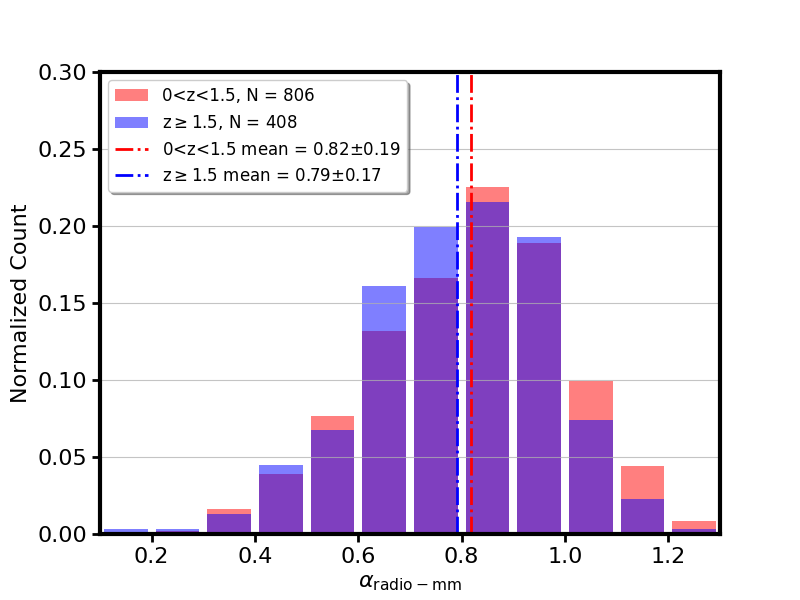

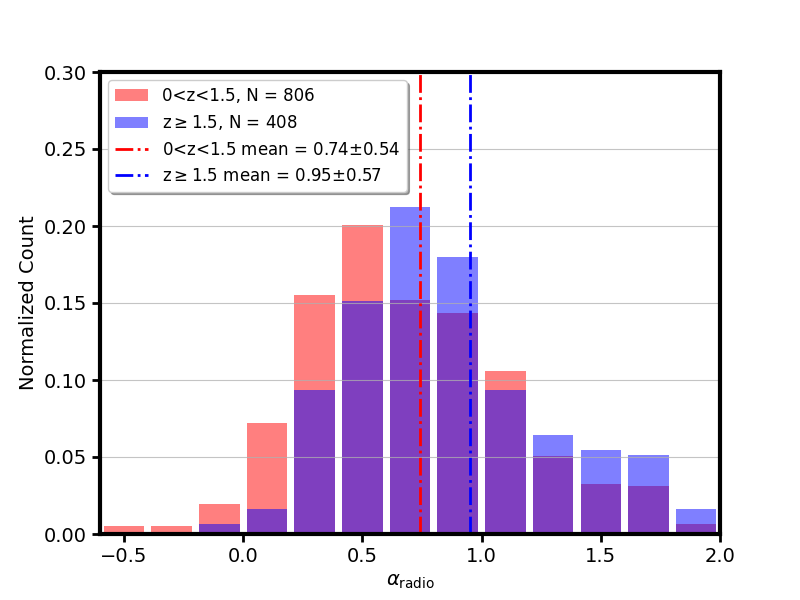

In [164]:
### Radio-mm Spectral Index
sta_ks, p_ks = stats.ks_2samp(alphaK[zsep[3]], alphaK[zsep[4]])
sta_t, p_t = t_test(alphaK[zsep[3]], alphaK[zsep[4]])
sta_f, p_f = f_test(alphaK[zsep[3]], alphaK[zsep[4]])

z3K_med = np.nanmedian(alphaK[zsep[3]])
z4K_med = np.nanmedian(alphaK[zsep[4]])
z3K_mean = np.nanmean(alphaK[zsep[3]])
z4K_mean = np.nanmean(alphaK[zsep[4]])

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['axes.linewidth'] = 3

fig, ax = plt.subplots()
n, bins, p = plt.hist(alphaK[zsep[3]], bins = np.arange(-5, np.nanmax(alphaK[zsep[3]])+0.1, 0.1), density = 1,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = zsepname[3])
for item in p:
    item.set_height(item.get_height()/sum(n))
n, bins, p = plt.hist(alphaK[zsep[4]], bins = np.arange(-5, np.nanmax(alphaK[zsep[4]])+0.1, 0.1), density = 1,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = zsepname[4])
for item in p:
    item.set_height(item.get_height()/sum(n))

#plt.axvline(z3K_med, color = 'red', linestyle = 'dashed', linewidth = 2, label = '0<z<1.5 median = %4.2f' %(z3K_med))
plt.axvline(z3K_mean, color = 'red', linestyle = '-.', linewidth = 2, label = '0<z<1.5 mean = %4.2f$\pm$%4.2f' %(z3K_mean, np.std(alphaK[zsep[3]])))
#plt.axvline(z4K_med, color = 'blue', linestyle = 'dashed', linewidth = 2, label = 'z$\geq$1.5 median = %4.2f' %(z4K_med))
plt.axvline(z4K_mean, color = 'blue', linestyle = '-.', linewidth = 2, label = 'z$\geq$1.5 mean = %4.2f$\pm$%4.2f' %(z4K_mean, np.std(alphaK[zsep[4]])))

ax.set_xlim (0.1, 1.3)
ax.set_ylim (0, 0.3)    

# plt.text(0.1, 0.6, 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e, \
#     \nF-test result: \n statistic = %6.4f,\n p-value = %.2e, \
#     \nT-test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta_ks, p_ks, sta_f, p_f, sta_t, p_t), verticalalignment = 'top', fontsize = 12)
    
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('$\\alpha_\mathrm{radio-mm}$',  fontsize = 16)
plt.xticks(fontsize = 16)
plt.ylabel('Normalized Count',  fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc='upper left', shadow=True,  fontsize = 12, markerscale = 2) 
# figurename = 'Radio-mm Spectral Index \nDistributed by z=1.5 (K-corrected)'
# plt.title(figurename, fontsize = 18)

plt.savefig('/Users/87steven/Documents/天文所/Master Thesis/figures/chapter 4/Spectral index/Radio-mm Spectral Index of high_low z.pdf', bbox_inches = 'tight')

#######################################################################################################
### Radio Spectral Index
#######################################################################################################
sta_ks, p_ks = stats.ks_2samp(alphaRadK[zsep[3]], alphaRadK[zsep[4]])
sta_t, p_t = t_test(alphaRadK[zsep[3]], alphaRadK[zsep[4]])
sta_f, p_f = f_test(alphaRadK[zsep[3]], alphaRadK[zsep[4]])

z3RadK_med = np.nanmedian(alphaRadK[zsep[3]])
z4RadK_med = np.nanmedian(alphaRadK[zsep[4]])
z3RadK_mean = np.nanmean(alphaRadK[zsep[3]])
z4RadK_mean = np.nanmean(alphaRadK[zsep[4]])

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['axes.linewidth'] = 3

fig, ax = plt.subplots()
n, bins, p = plt.hist(alphaRadK[zsep[3]], bins = np.arange(-5, np.nanmax(alphaRadK[zsep[3]])+0.1, 0.2), density = 1,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = zsepname[3])
for item in p:
    item.set_height(item.get_height()/sum(n))
n, bins, p = plt.hist(alphaRadK[zsep[4]], bins = np.arange(-5, np.nanmax(alphaRadK[zsep[4]])+0.1, 0.2), density = 1,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = zsepname[4])
for item in p:
    item.set_height(item.get_height()/sum(n))

#plt.axvline(z3RadK_med, color = 'red', linestyle = 'dashed', linewidth = 2, label = '0<z<1.5 median = %4.2f' %(z3RadK_med))
plt.axvline(z3RadK_mean, color = 'red', linestyle = '-.', linewidth = 2, label = '0<z<1.5 mean = %4.2f$\pm$%4.2f' %(z3RadK_mean, np.std(alphaRadK[zsep[3]])))
#plt.axvline(z4RadK_med, color = 'blue', linestyle = 'dashed', linewidth = 2, label = 'z$\geq$1.5 median = %4.2f' %(z4RadK_med))
plt.axvline(z4RadK_mean, color = 'blue', linestyle = '-.', linewidth = 2, label = 'z$\geq$1.5 mean = %4.2f$\pm$%4.2f' %(z4RadK_mean, np.std(alphaRadK[zsep[4]])))

ax.set_xlim (-0.6, 2.0)
ax.set_ylim (0, 0.3)    

# plt.text(0.1, 0.6, 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e, \
#     \nF-test result: \n statistic = %6.4f,\n p-value = %.2e, \
#     \nT-test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta_ks, p_ks, sta_f, p_f, sta_t, p_t), verticalalignment = 'top', fontsize = 12)
    
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('$\\alpha_\mathrm{radio}$', fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('Normalized Count', fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left', shadow=True,  fontsize = 12, markerscale = 2) 
# figurename = 'Radio Spectral Index \nDistributed by z=1.5 (K-corrected)'
# plt.title(figurename, fontsize = 18)

plt.savefig('/Users/87steven/Documents/天文所/Master Thesis/figures/chapter 4/Spectral index/Radio Spectral Index of high_low z.pdf', bbox_inches = 'tight')



Text(0.5, 1.0, 'Redshift Distribution of BL Lac and QSO')

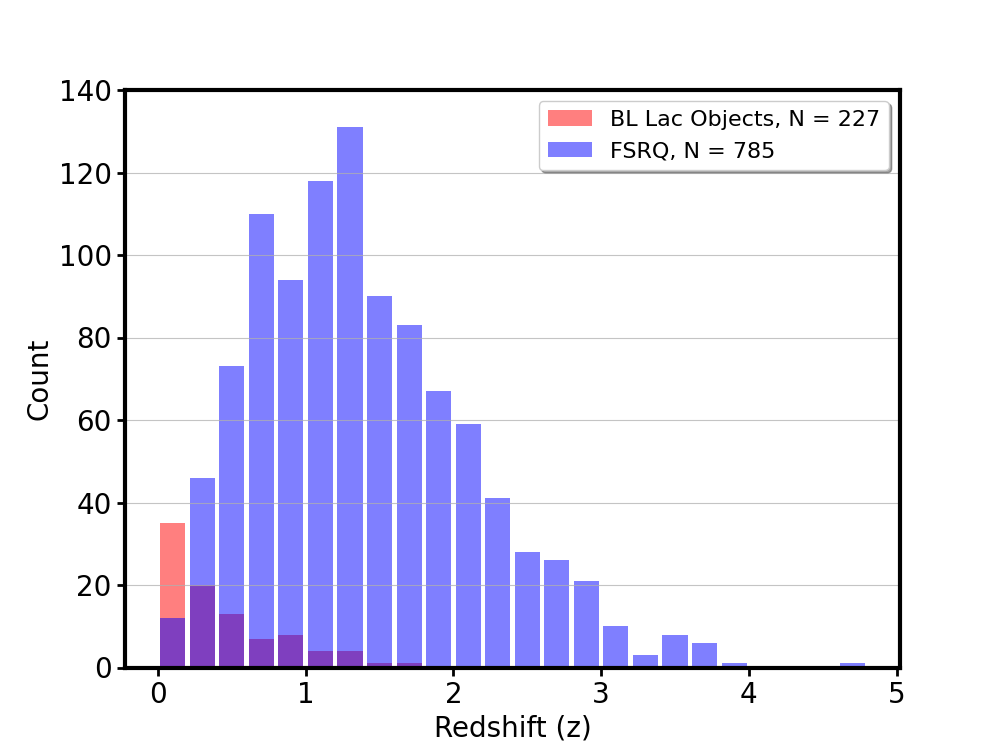

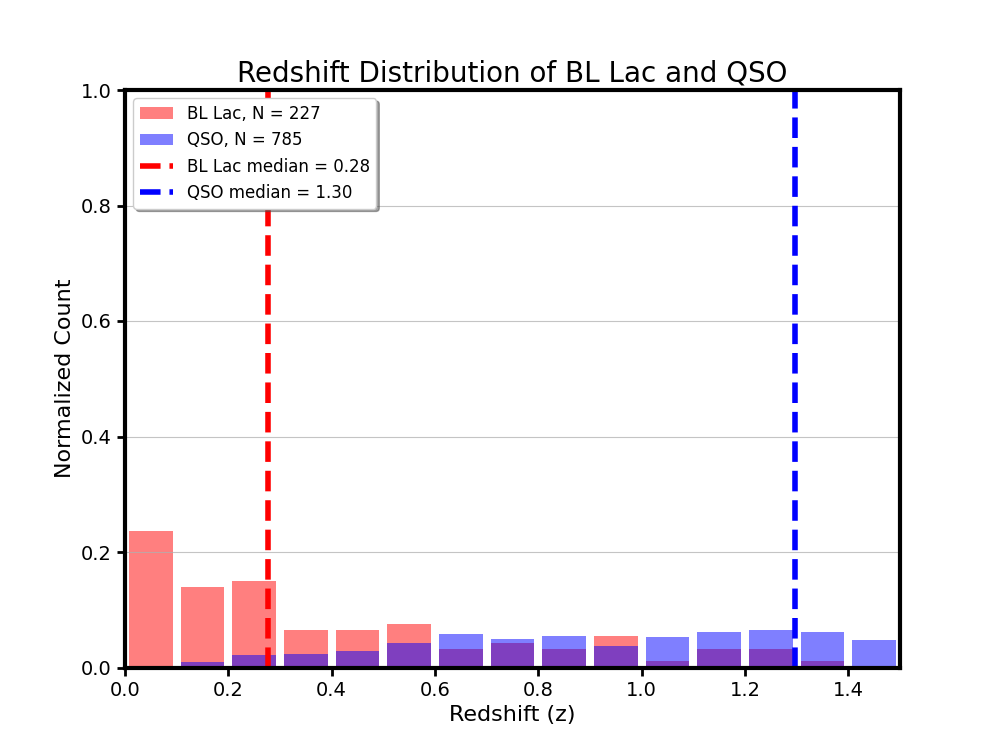

In [165]:
#######################################################################################################
### redshift distribution of BL Lac and QSO
#######################################################################################################
BL_Lac = np.hstack([ classclassify[1], classclassify[2], classclassify[4] ])

z_BL_Lac  = z[ BL_Lac ]
z_BL_Lac[z_BL_Lac == 0] = np.nan

z_QSO = np.array(z[classclassify[3]])
z_QSO[z_QSO == 0] = np.nan

z_BL_Lac_med = np.nanmedian(z_BL_Lac)
z_QSO_med = np.nanmedian(z_QSO)

sta, pvalue = stats.ks_2samp(z_BL_Lac, z_QSO)
sta_t, p_t = t_test(z_BL_Lac, z_QSO)
sta_f, p_f = f_test(z_BL_Lac, z_QSO)

#######################################################################################################
### no Normalized
#######################################################################################################
plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

n, bins, p = plt.hist(z_BL_Lac, bins = np.arange(0., np.nanmax(z_BL_Lac)+0.2, 0.2),
                                color = 'red', alpha = 0.5, rwidth = 0.85, label = 'BL Lac Objects, N = '+str(len(BL_Lac)))

n, bins, p = plt.hist(z_QSO, bins = np.arange(0., np.nanmax(z_QSO)+0.2, 0.2),
                                color = 'blue', alpha = 0.5, rwidth = 0.85, label = 'FSRQ, N = '+str(len(QSO)))

#plt.axvline(z_BL_Lac_med, color = 'red', linestyle = 'dashed', linewidth = 4, label = 'BL Lac median = %4.2f' %(z_BL_Lac_med))
#plt.axvline(z_QSO_med, color = 'blue', linestyle = 'dashed', linewidth = 4, label = 'QSO median = %4.2f' %(z_QSO_med))

#ax.set_xlim (0., 1.5)
ax.set_ylim (0, 140)    

#plt.text(2.7, 0.75, 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e, \
#    \nF-test result: \n statistic = %6.4f,\n p-value = %.2e, \
#    \nT-test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta_ks, p_ks, sta_f, p_f, sta_t, p_t), verticalalignment = 'top', fontsize = 14)
    
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Redshift (z)',  fontsize = 20)
plt.xticks(fontsize = 20)
plt.ylabel('Count',  fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc = 'upper right', shadow = True, fontsize = 16, markerscale = 2) 
#figurename = 'Redshift Distribution of BL Lac and QSO'
#plt.title(figurename, fontsize = 20)

plt.savefig('/Users/87steven/Documents/天文所/Master Thesis/figures/chapter 4/Spectral index/redshift distribution.pdf', bbox_inches = 'tight')

#######################################################################################################
### Normalized
#######################################################################################################
plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

n, bins, p = plt.hist(z_BL_Lac, bins = np.arange(0., np.nanmax(z_BL_Lac)+0.1, 0.1), density = True,
                                color = 'red', alpha = 0.5, rwidth = 0.85, label = 'BL Lac, N = '+str(len(BL_Lac)))
for item in p:
    item.set_height(item.get_height()/sum(n)) 
n, bins, p = plt.hist(z_QSO, bins = np.arange(0., np.nanmax(z_QSO)+0.1, 0.1), density = True,
                                color = 'blue', alpha = 0.5, rwidth = 0.85, label = 'QSO, N = '+str(len(QSO)))
for item in p:
    item.set_height(item.get_height()/sum(n)) 
    
plt.axvline(z_BL_Lac_med, color = 'red', linestyle = 'dashed', linewidth = 4, label = 'BL Lac median = %4.2f' %(z_BL_Lac_med))
plt.axvline(z_QSO_med, color = 'blue', linestyle = 'dashed', linewidth = 4, label = 'QSO median = %4.2f' %(z_QSO_med))

ax.set_xlim (0., 1.5)
ax.set_ylim (0, 1)    

plt.text(2.7, 0.75, 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e, \
    \nF-test result: \n statistic = %6.4f,\n p-value = %.2e, \
    \nT-test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta_ks, p_ks, sta_f, p_f, sta_t, p_t), verticalalignment = 'top', fontsize = 14)
    
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Redshift (z)',  fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Normalized Count',  fontsize = 16)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left', shadow=True,  fontsize = 12, markerscale = 2) 
figurename = 'Redshift Distribution of BL Lac and QSO'
plt.title(figurename, fontsize = 20)


In [50]:
np.nanmax(z_QSO)

4.63

/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_56252/516061148.py:10: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alpK_QSO = alphaK[QSO_z]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_56252/516061148.py:14: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alpRadK_QSO = alphaRadK[QSO_z]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_56252/516061148.py:21: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alpK_BL_Lac = alphaK[BL_Lac_z]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_56252/516061148.py:25: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alpRadK_BL_Lac = alphaRadK[BL_Lac_z]


Text(0.5, 0.98, 'Spectral index (K-corrected) Distributoion of QSO and BL Lac\n with 0 < z < 0.4')

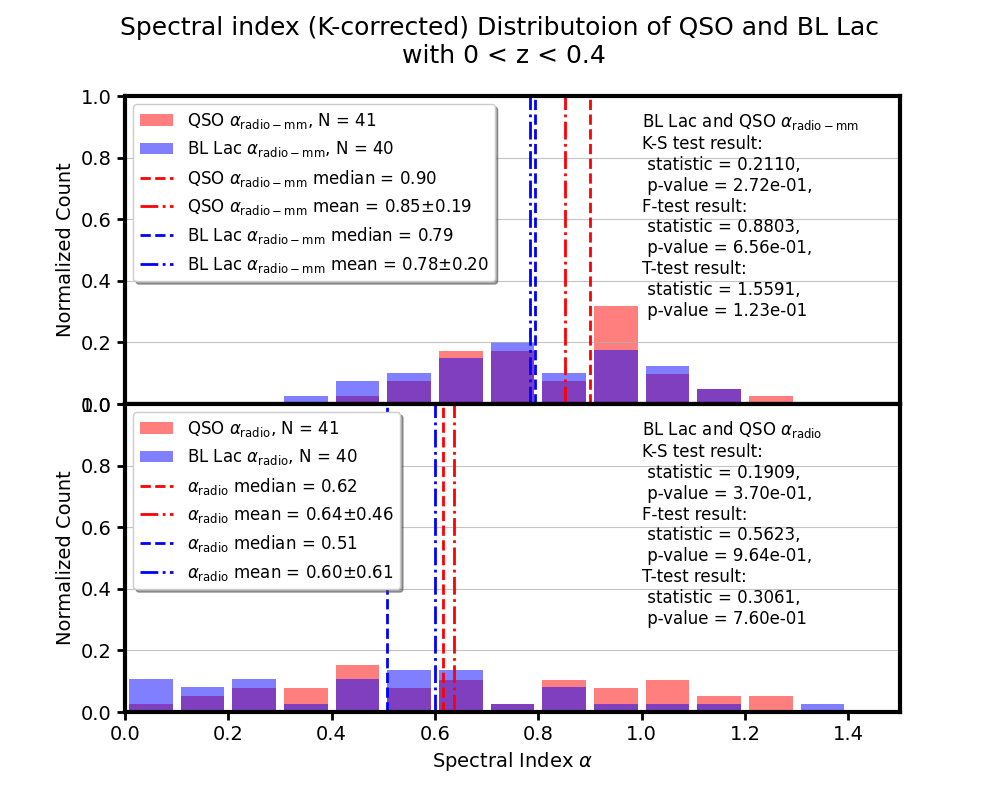

In [8]:
#######################################################################################################
### Low z BL Lac and QSO spectral index
#######################################################################################################
z_int = np.where((z > 0.) & (z <= 0.4))[0]

### Find QSO index with 0.6 < z < 1.0
QSO_z = set(classclassify[3]) & set(z_int)  

# rario-mm spectral index
alpK_QSO = alphaK[QSO_z]
alpK_QSO = alpK_QSO[~np.isnan(alpK_QSO)]

# rario spectral index
alpRadK_QSO = alphaRadK[QSO_z]
alpRadK_QSO = alpRadK_QSO[~np.isnan(alpRadK_QSO)]

### Find BL Lac index with 0.6 < z < 1.0
BL_Lac_z = set(np.hstack([ classclassify[1], classclassify[2], classclassify[4] ])) & set(z_int) 

# BL Lac radio-mm spectral index
alpK_BL_Lac = alphaK[BL_Lac_z]
alpK_BL_Lac = alpK_BL_Lac[~np.isnan(alpK_BL_Lac)]
    
# BL Lac radio spectral index
alpRadK_BL_Lac = alphaRadK[BL_Lac_z]
alpRadK_BL_Lac = alpRadK_BL_Lac[~np.isnan(alpRadK_BL_Lac)]

### Statistical test
sta_ks, p_ks = stats.ks_2samp(alpK_QSO, alpK_BL_Lac)
sta_t, p_t = t_test(alpK_QSO, alpK_BL_Lac)
sta_f, p_f = f_test(alpK_QSO, alpK_BL_Lac)

sta_ks1, p_ks1 = stats.ks_2samp(alpRadK_QSO, alpRadK_BL_Lac)
sta_t1, p_t1 = t_test(alpRadK_QSO, alpRadK_BL_Lac)
sta_f1, p_f1 = f_test(alpRadK_QSO, alpRadK_BL_Lac)

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['axes.linewidth'] = 3
plt.rc('font', size = 14)    
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 2
fig = plt.figure()
gs = fig.add_gridspec(2, 1, hspace = 0)
axs = gs.subplots() # , sharey='row'


#axs[0].plot([], [], ' ', label = "QSO with 0.6 < z < 1.0")
n1, bins, p = axs[0].hist(alpK_QSO, bins = np.arange(0., max(alpK_QSO)+0.1, 0.1), density = 1,
                          color = 'red', alpha = 0.5, rwidth=0.85, label = 'QSO $\\alpha_\mathrm{radio-mm}$, N = '+str(len(alpK_QSO)) )
for item in p:
        item.set_height(item.get_height()/sum(n1))
        
n2, bins, p = axs[0].hist(alpK_BL_Lac, bins = np.arange(0., max(alpK_BL_Lac)+0.1, 0.1), density = 1,
                          color = 'blue', alpha = 0.5, rwidth=0.85, label = 'BL Lac $\\alpha_\mathrm{radio-mm}$, N = '+str(len(alpK_BL_Lac)) )
for item in p:
        item.set_height(item.get_height()/sum(n2))
        
axs[0].axvline(np.median(alpK_QSO), color = 'red', linestyle = 'dashed', linewidth = 2, label = 'QSO $\\alpha_\mathrm{radio-mm}$ median = %4.2f' % np.median(alpK_QSO))
axs[0].axvline(np.mean(alpK_QSO), color = 'red', linestyle = '-.', linewidth = 2, label = 'QSO $\\alpha_\mathrm{radio-mm}$ mean = %4.2f$\pm$%4.2f' %(np.mean(alpK_QSO), np.std(alpK_QSO)))
axs[0].axvline(np.median(alpK_BL_Lac), color = 'blue', linestyle = 'dashed', linewidth = 2, label = 'BL Lac $\\alpha_\mathrm{radio-mm}$ median = %4.2f' % np.median(alpK_BL_Lac))
axs[0].axvline(np.mean(alpK_BL_Lac), color = 'blue', linestyle = '-.', linewidth = 2, label = 'BL Lac $\\alpha_\mathrm{radio-mm}$ mean = %4.2f$\pm$%4.2f' %(np.mean(alpK_BL_Lac), np.std(alpK_BL_Lac)))



axs[0].text(1., 0.95, 'BL Lac and QSO $\\alpha_\mathrm{radio-mm}$ \
    \nK-S test result: \n statistic = %6.4f,\n p-value = %.2e, \
    \nF-test result: \n statistic = %6.4f,\n p-value = %.2e, \
    \nT-test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta_ks, p_ks, sta_f, p_f, sta_t, p_t), verticalalignment = 'top', fontsize = 12)

axs[0].set_xlim (0., 1.5)
axs[0].set_ylim (0, 1)
axs[0].grid(axis = 'y', alpha = 0.75)
axs[0].legend(loc = 'upper left', shadow = True,  fontsize = 12, markerscale = 1) 

#axs[1].plot([], [], ' ', label = "BL Lac with 0.6 < z < 1.0")
n1, bins, p = axs[1].hist(alpRadK_QSO, bins = np.arange(0., max(alpRadK_QSO)+0.1, 0.1), density = 1,
                          color = 'red', alpha = 0.5, rwidth=0.85, label = 'QSO $\\alpha_\mathrm{radio}$, N = '+str(len(alpRadK_QSO)) )
for item in p:
        item.set_height(item.get_height()/sum(n1))
        
n2, bins, p = axs[1].hist(alpRadK_BL_Lac, bins = np.arange(0., max(alpRadK_BL_Lac)+0.1, 0.1), density = 1,
                          color = 'blue', alpha = 0.5, rwidth=0.85, label = 'BL Lac $\\alpha_\mathrm{radio}$, N = '+str(len(alpRadK_BL_Lac)) )
for item in p:
        item.set_height(item.get_height()/sum(n2))
        
axs[1].axvline(np.median(alpRadK_QSO), color = 'red', linestyle = 'dashed', linewidth = 2, label = '$\\alpha_\mathrm{radio}$ median = %4.2f' % np.median(alpRadK_QSO))
axs[1].axvline(np.mean(alpRadK_QSO), color = 'red', linestyle = '-.', linewidth = 2, label = '$\\alpha_\mathrm{radio}$ mean = %4.2f$\pm$%4.2f' %(np.mean(alpRadK_QSO), np.std(alpRadK_QSO)))
axs[1].axvline(np.median(alpRadK_BL_Lac), color = 'blue', linestyle = 'dashed', linewidth = 2, label = '$\\alpha_\mathrm{radio}$ median = %4.2f' % np.median(alpRadK_BL_Lac))
axs[1].axvline(np.mean(alpRadK_BL_Lac), color = 'blue', linestyle = '-.', linewidth = 2, label = '$\\alpha_\mathrm{radio}$ mean = %4.2f$\pm$%4.2f' %(np.mean(alpRadK_BL_Lac), np.std(alpRadK_BL_Lac)))

axs[1].text(1., 0.95, 'BL Lac and QSO $\\alpha_\mathrm{radio}$ \
    \nK-S test result: \n statistic = %6.4f,\n p-value = %.2e, \
    \nF-test result: \n statistic = %6.4f,\n p-value = %.2e, \
    \nT-test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta_ks1, p_ks1, sta_f1, p_f1, sta_t1, p_t1), verticalalignment = 'top', fontsize = 12)


axs[1].set_xlim (0., 1.5)
axs[1].set_ylim (0, 1)
axs[1].grid(axis = 'y', alpha = 0.75)
axs[1].legend(loc = 'upper left', shadow = True,  fontsize = 12, markerscale = 1) 

for ax in axs.flat:
    ax.set(xlabel = 'Spectral Index $\\alpha$', ylabel = 'Normalized Count')
            
for ax in axs.flat:
    ax.label_outer()
    
figurename = 'Spectral index (K-corrected) Distributoion of QSO and BL Lac\n with 0 < z < 0.4'
plt.suptitle(figurename, fontsize = 18)

/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_56252/2536019706.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alp_QSO_lt15 = alpha[below1_5]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_56252/2536019706.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alp_QSO_gt15 = alpha[greater1_5]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_56252/2536019706.py:13: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alpRad_QSO_lt15 = alphaRad[below1_5]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_56252/2536019706.py:16: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alpRad_QSO_gt15 = alphaRad[greater1_5]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_56252/25360

Text(0.5, 0.98, 'Spectral index (after K-correction) Distributoion of QSO')

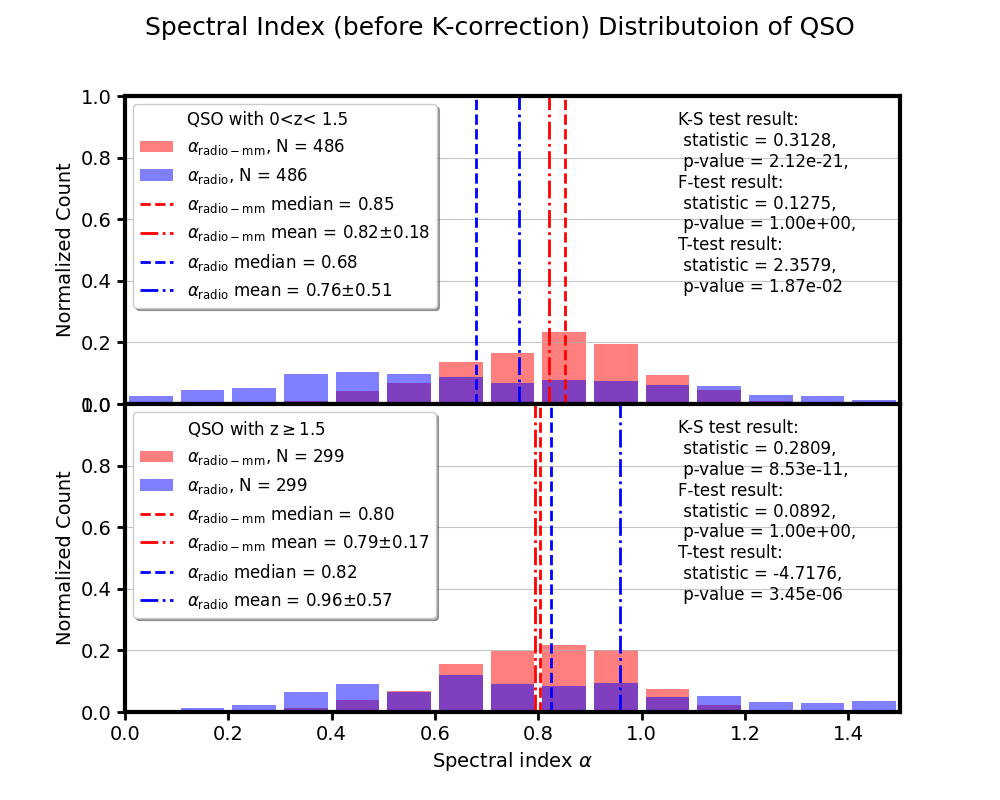

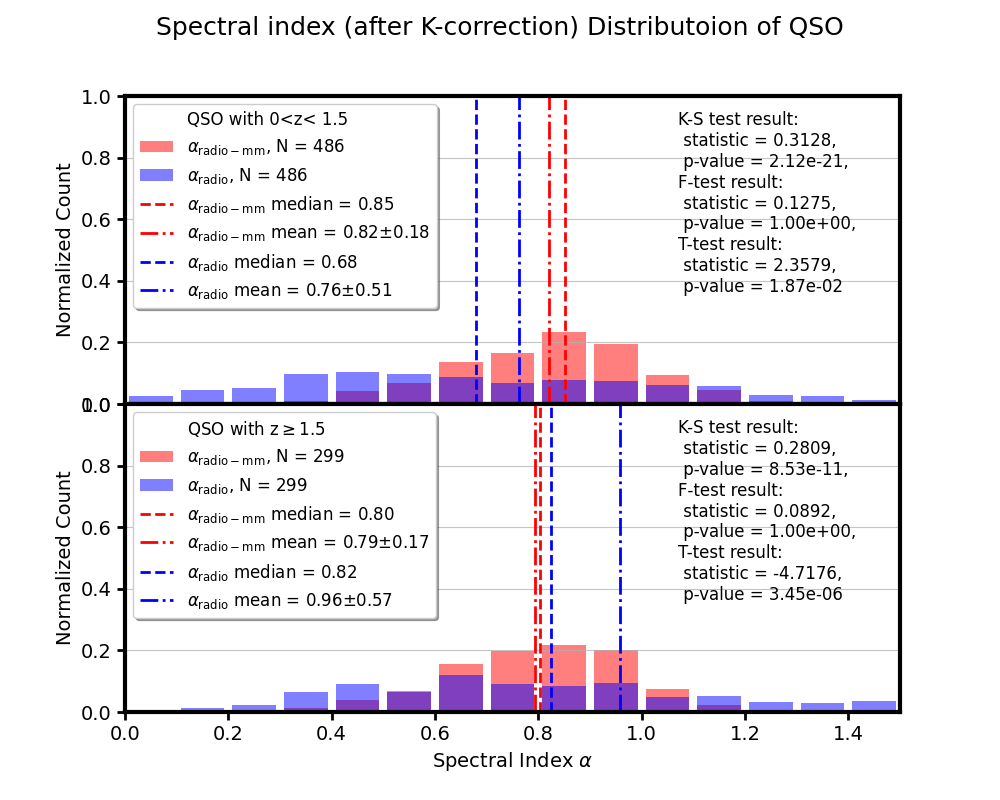

In [9]:
### Seperate QSO spectral with z greater or lower than 1.5 (Before K-correction)
below1_5 = set(classclassify[3]) & set(zsep[3])  # classclassify[3] => QSO, zsep[3] = 0 < z < 1.5
greater1_5 = set(classclassify[3]) & set(zsep[4])  # zsep[3] = z >= 1.5

# rario-mm spectral index
alp_QSO_lt15 = alpha[below1_5]
alp_QSO_lt15 = alp_QSO_lt15[~np.isnan(alp_QSO_lt15)]

alp_QSO_gt15 = alpha[greater1_5]
alp_QSO_gt15 = alp_QSO_gt15[~np.isnan(alp_QSO_gt15)]

# rario spectral index
alpRad_QSO_lt15 = alphaRad[below1_5]
alpRad_QSO_lt15 = alpRad_QSO_lt15[~np.isnan(alpRad_QSO_lt15)]

alpRad_QSO_gt15 = alphaRad[greater1_5]
alpRad_QSO_gt15 = alpRad_QSO_gt15[~np.isnan(alpRad_QSO_gt15)]
    
# statisitcal test
sta_ks1, p_ks1 = stats.ks_2samp(alp_QSO_lt15, alpRad_QSO_lt15)
sta_t1, p_t1 = t_test(alp_QSO_lt15, alpRad_QSO_lt15)
sta_f1, p_f1 = f_test(alp_QSO_lt15, alpRad_QSO_lt15)

sta_ks2, p_ks2 = stats.ks_2samp(alp_QSO_gt15, alpRad_QSO_gt15)
sta_t2, p_t2 = t_test(alp_QSO_gt15, alpRad_QSO_gt15)
sta_f2, p_f2 = f_test(alp_QSO_gt15, alpRad_QSO_gt15)
    
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['axes.linewidth'] = 3
plt.rc('font', size = 14)    
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 2
fig = plt.figure()
gs = fig.add_gridspec(2, 1, hspace = 0)
axs = gs.subplots() # , sharey='row'
    
# figure 1
axs[0].plot([], [], ' ', label = "QSO with 0<z< 1.5")
n1, bins, p = axs[0].hist(alp_QSO_lt15, bins = np.arange(0.1, max(alp_QSO_lt15) +0.1, 0.1), density = 1,
                            color = 'red', alpha = 0.5, rwidth=0.85, label = '$\\alpha_\mathrm{radio-mm}$, N = '+str(len(alp_QSO_lt15)))
for item in p:
        item.set_height(item.get_height()/sum(n1))
n2, bins, p = axs[0].hist(alpRad_QSO_lt15, bins = np.arange(0., max(alpRad_QSO_lt15) +0.1, 0.1), density = 1,
                          color = 'blue', alpha = 0.5, rwidth=0.85, label = '$\\alpha_\mathrm{radio}$, N = '+str(len(alpRad_QSO_lt15)))
for item in p:
        item.set_height(item.get_height()/sum(n2))
        
axs[0].axvline(np.median(alp_QSO_lt15), color = 'red', linestyle = 'dashed', linewidth = 2, label = '$\\alpha_\mathrm{radio-mm}$ median = %4.2f' % np.median(alp_QSO_lt15))
axs[0].axvline(np.mean(alp_QSO_lt15), color = 'red', linestyle = '-.', linewidth = 2, label = '$\\alpha_\mathrm{radio-mm}$ mean = %4.2f$\pm$%4.2f' %(np.mean(alp_QSO_lt15), np.std(alp_QSO_lt15)))
axs[0].axvline(np.median(alpRad_QSO_lt15), color = 'blue', linestyle = 'dashed', linewidth = 2, label = '$\\alpha_\mathrm{radio}$ median = %4.2f' % np.median(alpRad_QSO_lt15))
axs[0].axvline(np.mean(alpRad_QSO_lt15), color = 'blue', linestyle = '-.', linewidth = 2, label = '$\\alpha_\mathrm{radio}$ mean = %4.2f$\pm$%4.2f' %(np.mean(alpRad_QSO_lt15), np.std(alpRad_QSO_lt15)))

axs[0].text(1.07, 0.95, 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e, \
    \nF-test result: \n statistic = %6.4f,\n p-value = %.2e, \
    \nT-test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta_ks1, p_ks1, sta_f1, p_f1, sta_t1, p_t1), verticalalignment = 'top', fontsize = 12)

axs[0].set_xlim (0., 1.5)
axs[0].set_ylim (0, 1)
axs[0].grid(axis = 'y', alpha = 0.75)
axs[0].legend(loc = 'upper left', shadow = True,  fontsize = 12, markerscale = 1) 

# figure 2
axs[1].plot([], [], ' ', label = "QSO with z$\geq$1.5")
n1, bins, p = axs[1].hist(alp_QSO_gt15, bins = np.arange(0.1, max(alp_QSO_gt15) +0.1, 0.1), density = 1,
                          color = 'red', alpha = 0.5, rwidth=0.85, label = '$\\alpha_\mathrm{radio-mm}$, N = '+str(len(alp_QSO_gt15)) )
for item in p:
        item.set_height(item.get_height()/sum(n1))
n2, bins, p = axs[1].hist(alpRad_QSO_gt15, bins = np.arange(0., max(alpRad_QSO_gt15) +0.1, 0.1), density = 1,
                          color = 'blue', alpha = 0.5, rwidth=0.85, label = '$\\alpha_\mathrm{radio}$, N = '+str(len(alpRad_QSO_gt15)) )
for item in p:
        item.set_height(item.get_height()/sum(n2))
        
axs[1].axvline(np.median(alp_QSO_gt15), color = 'red', linestyle = 'dashed', linewidth = 2, label =  '$\\alpha_\mathrm{radio-mm}$ median = %4.2f' % np.median(alp_QSO_gt15))
axs[1].axvline(np.mean(alp_QSO_gt15), color = 'red', linestyle = '-.', linewidth = 2, label =  '$\\alpha_\mathrm{radio-mm}$ mean = %4.2f$\pm$%4.2f' %(np.mean(alp_QSO_gt15), np.std(alp_QSO_gt15)))
axs[1].axvline(np.median(alpRad_QSO_gt15), color = 'blue', linestyle = 'dashed', linewidth = 2, label = '$\\alpha_\mathrm{radio}$ median = %4.2f' % np.median(alpRad_QSO_gt15))
axs[1].axvline(np.mean(alpRad_QSO_gt15), color = 'blue', linestyle = '-.', linewidth = 2, label = '$\\alpha_\mathrm{radio}$ mean = %4.2f$\pm$%4.2f' %(np.mean(alpRad_QSO_gt15), np.std(alpRad_QSO_gt15)))

axs[1].text(1.07, 0.95, 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e, \
    \nF-test result: \n statistic = %6.4f,\n p-value = %.2e, \
    \nT-test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta_ks2, p_ks2, sta_f2, p_f2, sta_t2, p_t2), verticalalignment = 'top', fontsize = 12)

axs[1].set_xlim (0., 1.5)
axs[1].set_ylim (0, 1)
axs[1].grid(axis = 'y', alpha = 0.75)
axs[1].legend(loc = 'upper left', shadow = True,  fontsize = 12, markerscale = 1) 

for ax in axs.flat:
    ax.set(xlabel = 'Spectral index $\\alpha$', ylabel = 'Normalized Count')
            
for ax in axs.flat:
    ax.label_outer()

figurename = 'Spectral Index (before K-correction) Distributoion of QSO'
fig.suptitle(figurename, fontsize = 18)
#######################################################################################################
### Seperate QSO spectral with z greater or lower than 1.5 (after K-correction)
below1_5 = set(classclassify[3]) & set(zsep[3])  # classclassify[3] = QSO, zsep[3] = 0 < z < 1.5
greater1_5 = set(classclassify[3]) & set(zsep[4])  # zsep[3] = z >= 1.5

# rario-mm spectral index
alpK_QSO_lt15 = alphaK[below1_5]
alpK_QSO_lt15 = alpK_QSO_lt15[~np.isnan(alpK_QSO_lt15)]
alpK_QSO_gt15 = alphaK[greater1_5]
alpK_QSO_gt15 = alpK_QSO_gt15[~np.isnan(alpK_QSO_gt15)]

# rario spectral index
alpRadK_QSO_lt15 = alphaRadK[below1_5]
alpRadK_QSO_lt15 = alpRadK_QSO_lt15[~np.isnan(alpRadK_QSO_lt15)]
alpRadK_QSO_gt15 = alphaRadK[greater1_5]
alpRadK_QSO_gt15 = alpRadK_QSO_gt15[~np.isnan(alpRadK_QSO_gt15)]
    
# statistical test
sta_ks1, p_ks1 = stats.ks_2samp(alpK_QSO_lt15, alpRadK_QSO_lt15)
sta_t1, p_t1 = t_test(alpK_QSO_lt15, alpRadK_QSO_lt15)
sta_f1, p_f1 = f_test(alpK_QSO_lt15, alpRadK_QSO_lt15)

sta_ks2, p_ks2 = stats.ks_2samp(alpK_QSO_gt15, alpRadK_QSO_gt15)
sta_t2, p_t2 = t_test(alpK_QSO_gt15, alpRadK_QSO_gt15)
sta_f2, p_f2 = f_test(alpK_QSO_gt15, alpRadK_QSO_gt15)
    
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['axes.linewidth'] = 3
plt.rc('font', size = 14)    
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 2
fig = plt.figure()
gs = fig.add_gridspec(2, 1, hspace = 0)
axs = gs.subplots() # , sharey='row'
    
# figure 1
axs[0].plot([], [], ' ', label = "QSO with 0<z< 1.5")
n1, bins, p = axs[0].hist(alpK_QSO_lt15, bins = np.arange(0., max(alpK_QSO_lt15) +0.1, 0.1), density = 1,
                            color = 'red', alpha = 0.5, rwidth=0.85, label = '$\\alpha_\mathrm{radio-mm}$, N = '+str(len(alpK_QSO_lt15)))
for item in p:
        item.set_height(item.get_height()/sum(n1))
n2, bins, p = axs[0].hist(alpRadK_QSO_lt15, bins = np.arange(0., max(alpRadK_QSO_lt15) +0.1, 0.1), density = 1,
                          color = 'blue', alpha = 0.5, rwidth=0.85, label = '$\\alpha_\mathrm{radio}$, N = '+str(len(alpRadK_QSO_lt15)))
for item in p:
        item.set_height(item.get_height()/sum(n2))
        
axs[0].axvline(np.median(alpK_QSO_lt15), color = 'red', linestyle = 'dashed', linewidth = 2, label =  '$\\alpha_\mathrm{radio-mm}$ median = %4.2f' % np.median(alpK_QSO_lt15))
axs[0].axvline(np.mean(alpK_QSO_lt15), color = 'red', linestyle = '-.', linewidth = 2, label =  '$\\alpha_\mathrm{radio-mm}$ mean = %4.2f$\pm$%4.2f' %(np.mean(alpK_QSO_lt15), np.std(alpK_QSO_lt15)))
axs[0].axvline(np.median(alpRadK_QSO_lt15), color = 'blue', linestyle = 'dashed', linewidth = 2, label = '$\\alpha_\mathrm{radio}$ median = %4.2f' % np.median(alpRadK_QSO_lt15))
axs[0].axvline(np.mean(alpRadK_QSO_lt15), color = 'blue', linestyle = '-.', linewidth = 2, label = '$\\alpha_\mathrm{radio}$ mean = %4.2f$\pm$%4.2f' %(np.mean(alpRadK_QSO_lt15), np.std(alpRadK_QSO_lt15)))

axs[0].text(1.07, 0.95, 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e, \
    \nF-test result: \n statistic = %6.4f,\n p-value = %.2e, \
    \nT-test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta_ks1, p_ks1, sta_f1, p_f1, sta_t1, p_t1), verticalalignment = 'top', fontsize = 12)

axs[0].set_xlim (0., 1.5)
axs[0].set_ylim (0, 1)
axs[0].grid(axis = 'y', alpha = 0.75)
axs[0].legend(loc = 'upper left', shadow = True,  fontsize = 12, markerscale = 1) 

# figure 2
axs[1].plot([], [], ' ', label = "QSO with z$\geq$1.5")
n1, bins, p = axs[1].hist(alpK_QSO_gt15, bins = np.arange(0., max(alpK_QSO_gt15) +0.1, 0.1), density = 1,
                          color = 'red', alpha = 0.5, rwidth=0.85, label = '$\\alpha_\mathrm{radio-mm}$, N = '+str(len(alpK_QSO_gt15)) )
for item in p:
        item.set_height(item.get_height()/sum(n1))
n2, bins, p = axs[1].hist(alpRadK_QSO_gt15, bins = np.arange(0., max(alpRadK_QSO_gt15) +0.1, 0.1), density = 1,
                          color = 'blue', alpha = 0.5, rwidth=0.85, label = '$\\alpha_\mathrm{radio}$, N = '+str(len(alpRadK_QSO_gt15)) )
for item in p:
        item.set_height(item.get_height()/sum(n2))
        
axs[1].axvline(np.median(alpK_QSO_gt15), color = 'red', linestyle = 'dashed', linewidth = 2, label = '$\\alpha_\mathrm{radio-mm}$ median = %4.2f' % np.median(alpK_QSO_gt15))
axs[1].axvline(np.mean(alpK_QSO_gt15), color = 'red', linestyle = '-.', linewidth = 2, label = '$\\alpha_\mathrm{radio-mm}$ mean = %4.2f$\pm$%4.2f' %(np.mean(alpK_QSO_gt15), np.std(alpK_QSO_gt15)))
axs[1].axvline(np.median(alpRadK_QSO_gt15), color = 'blue', linestyle = 'dashed', linewidth = 2, label = '$\\alpha_\mathrm{radio}$ median = %4.2f' % np.median(alpRadK_QSO_gt15))
axs[1].axvline(np.mean(alpRadK_QSO_gt15), color = 'blue', linestyle = '-.', linewidth = 2, label = '$\\alpha_\mathrm{radio}$ mean = %4.2f$\pm$%4.2f' %(np.mean(alpRadK_QSO_gt15), np.std(alpRadK_QSO_gt15)))

axs[1].text(1.07, 0.95, 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e, \
    \nF-test result: \n statistic = %6.4f,\n p-value = %.2e, \
    \nT-test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta_ks2, p_ks2, sta_f2, p_f2, sta_t2, p_t2), verticalalignment = 'top', fontsize = 12)

axs[1].set_xlim (0., 1.5)
axs[1].set_ylim (0, 1)
axs[1].grid(axis = 'y', alpha = 0.75)
axs[1].legend(loc = 'upper left', shadow = True,  fontsize = 12, markerscale = 1) 

for ax in axs.flat:
    ax.set(xlabel = 'Spectral Index $\\alpha$', ylabel = 'Normalized Count')
            
for ax in axs.flat:
    ax.label_outer()

figurename = 'Spectral index (after K-correction) Distributoion of QSO'
fig.suptitle(figurename, fontsize = 18)


/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_56252/1031854263.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alpK_QSO_lt15 = alphaK[below1_5]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_56252/1031854263.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alpK_QSO_gt15 = alphaK[greater1_5]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_56252/1031854263.py:13: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alpRadK_QSO_lt15 = alphaRadK[below1_5]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_56252/1031854263.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alpRadK_QSO_gt15 = alphaRadK[greater1_5]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_562

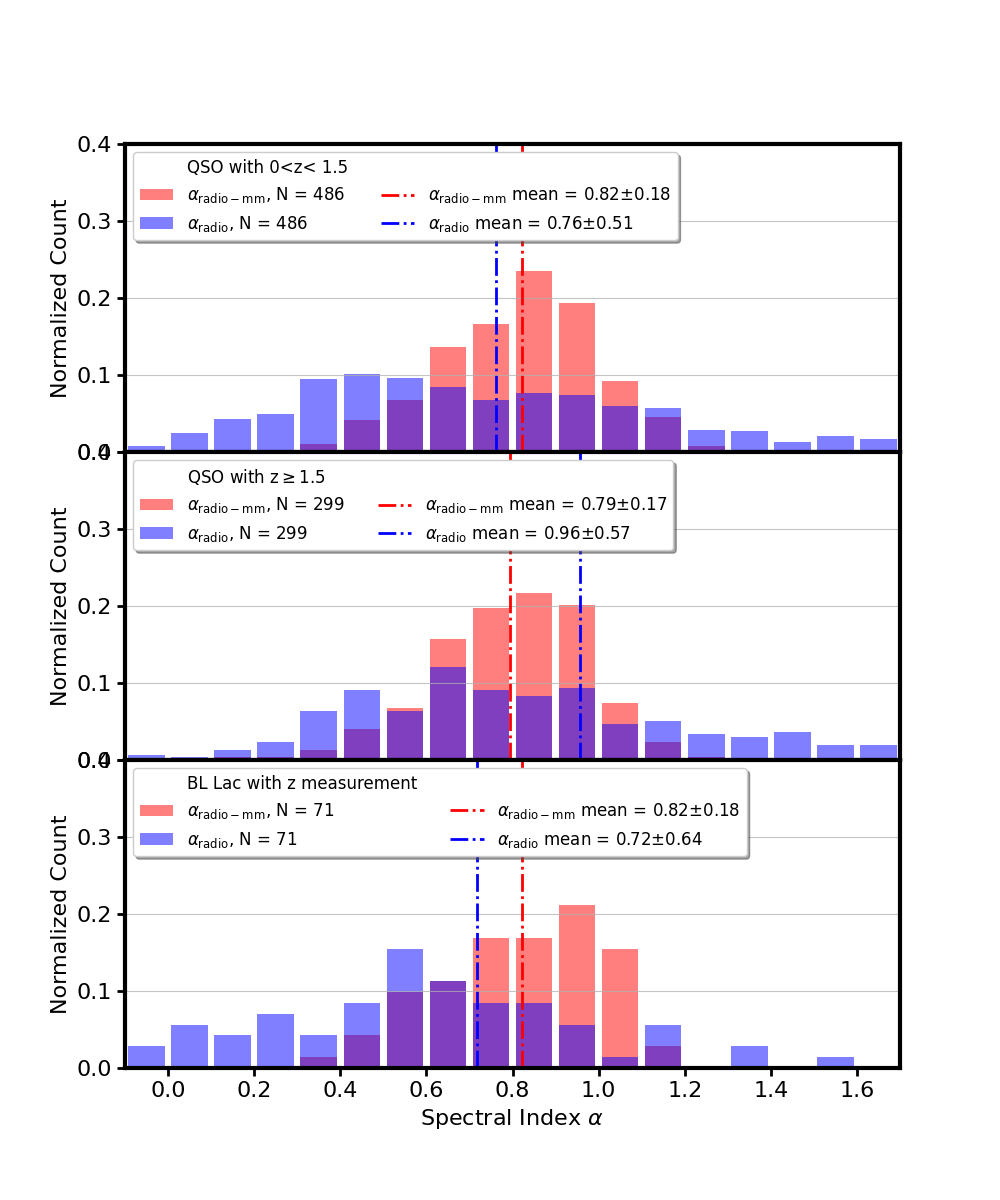

In [166]:
#######################################################################################################
### Seperate QSO spectral index with z greater or lower than 1.5 (after K-correction)
below1_5 = set(classclassify[3]) & set(zsep[3])  # classclassify[3] = QSO, zsep[3] = 0 < z < 1.5
greater1_5 = set(classclassify[3]) & set(zsep[4])  # zsep[3] = z >= 1.5

# QSO rario-mm spectral index
alpK_QSO_lt15 = alphaK[below1_5]
alpK_QSO_lt15 = alpK_QSO_lt15[~np.isnan(alpK_QSO_lt15)]
alpK_QSO_gt15 = alphaK[greater1_5]
alpK_QSO_gt15 = alpK_QSO_gt15[~np.isnan(alpK_QSO_gt15)]

# QSO rario spectral index
alpRadK_QSO_lt15 = alphaRadK[below1_5]
alpRadK_QSO_lt15 = alpRadK_QSO_lt15[~np.isnan(alpRadK_QSO_lt15)]
alpRadK_QSO_gt15 = alphaRadK[greater1_5]
alpRadK_QSO_gt15 = alpRadK_QSO_gt15[~np.isnan(alpRadK_QSO_gt15)]

# statistical test (radio and radio-mm spectral index of QSO)
sta_ks1, p_ks1 = stats.ks_2samp(alpK_QSO_lt15, alpRadK_QSO_lt15)
sta_t2, p_t2 = t_test(alpK_QSO_lt15, alpRadK_QSO_lt15)
sta_f2, p_f2 = f_test(alpK_QSO_lt15, alpRadK_QSO_lt15)

sta_ks2, p_ks2 = stats.ks_2samp(alpK_QSO_gt15, alpRadK_QSO_gt15)
sta_t2, p_t2 = t_test(alpK_QSO_gt15, alpRadK_QSO_gt15)
sta_f2, p_f2 = f_test(alpK_QSO_gt15, alpRadK_QSO_gt15)

# Seperate BL Lac spectral index with z > 0 (after K-correction)
BL_Lac_z = np.where((0 < z) & (z < 1.8))[0]
BL_Lac_gt0 = set(np.hstack([ classclassify[1], classclassify[2], classclassify[4] ])) & set(BL_Lac_z)

# BL Lac radio-mm spectral index
alpK_BL_Lac = alphaK[BL_Lac_gt0]
alpK_BL_Lac = alpK_BL_Lac[~np.isnan(alpK_BL_Lac)]
    
# BL Lac radio spectral index
alpRadK_BL_Lac = alphaRadK[BL_Lac_gt0]
alpRadK_BL_Lac = alpRadK_BL_Lac[~np.isnan(alpRadK_BL_Lac)]

# statistical test (radio and radio-mm spectral index of BL Lac and low z QSO)
sta_ks3, p_ks3 = stats.ks_2samp(alpK_BL_Lac, alpK_QSO_lt15)
sta_t3, p_t3 = t_test(alpK_BL_Lac, alpK_QSO_lt15)
sta_f3, p_f3 = f_test(alpK_BL_Lac, alpK_QSO_lt15)

sta_ks4, p_ks4 = stats.ks_2samp(alpRadK_BL_Lac, alpRadK_QSO_lt15)
sta_t4, p_t4 = t_test(alpRadK_BL_Lac, alpRadK_QSO_lt15)
sta_f4, p_f4 = f_test(alpRadK_BL_Lac, alpRadK_QSO_lt15)

### Plot
plt.rcParams['figure.figsize'] = [10, 12]
plt.rcParams['axes.linewidth'] = 3
plt.rc('font', size = 16)    
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 2
fig = plt.figure()
gs = fig.add_gridspec(3, 1, hspace = 0)
axs = gs.subplots() 
    
# figure 1
axs[0].plot([], [], ' ', label = "QSO with 0<z< 1.5")
n1, bins, p = axs[0].hist(alpK_QSO_lt15, bins = np.arange(-5, max(alpK_QSO_lt15) +0.1, 0.1), density = 1,
                            color = 'red', alpha = 0.5, rwidth=0.85, label = '$\\alpha_\mathrm{radio-mm}$, N = '+str(len(alpK_QSO_lt15)))
for item in p:
        item.set_height(item.get_height()/sum(n1))
n2, bins, p = axs[0].hist(alpRadK_QSO_lt15, bins = np.arange(-5, max(alpRadK_QSO_lt15) +0.1, 0.1), density = 1,
                          color = 'blue', alpha = 0.5, rwidth=0.85, label = '$\\alpha_\mathrm{radio}$, N = '+str(len(alpRadK_QSO_lt15)))
for item in p:
        item.set_height(item.get_height()/sum(n2))
        
axs[0].plot([], [], ' ', label = " ")

#axs[0].axvline(np.median(alpK_QSO_lt15), color = 'red', linestyle = 'dashed', linewidth = 2, label =  '$\\alpha_\mathrm{radio-mm}$ median = %4.2f' % np.median(alpK_QSO_lt15))
axs[0].axvline(np.mean(alpK_QSO_lt15), color = 'red', linestyle = '-.', linewidth = 2, label =  '$\\alpha_\mathrm{radio-mm}$ mean = %4.2f$\pm$%4.2f' %(np.mean(alpK_QSO_lt15), np.std(alpK_QSO_lt15)))
#axs[0].axvline(np.median(alpRadK_QSO_lt15), color = 'blue', linestyle = 'dashed', linewidth = 2, label = '$\\alpha_\mathrm{radio}$ median = %4.2f' % np.median(alpRadK_QSO_lt15))
axs[0].axvline(np.mean(alpRadK_QSO_lt15), color = 'blue', linestyle = '-.', linewidth = 2, label = '$\\alpha_\mathrm{radio}$ mean = %4.2f$\pm$%4.2f' %(np.mean(alpRadK_QSO_lt15), np.std(alpRadK_QSO_lt15)))

# axs[0].text(1., 0.95, 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e, \
#     \nF-test result: \n statistic = %6.4f,\n p-value = %.2e, \
#     \nT-test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta_ks1, p_ks1, sta_f1, p_f1, sta_t1, p_t1), verticalalignment = 'top', fontsize = 12)

axs[0].set_xlim (-0.1, 1.7)
axs[0].set_ylim (0, 0.4)
axs[0].grid(axis = 'y', alpha = 0.75)
axs[0].legend(loc = 'upper left', shadow = True,  fontsize = 12, markerscale = 1, ncol = 2) 

# figure 2
axs[1].plot([], [], ' ', label = "QSO with z$\geq$1.5")
n1, bins, p = axs[1].hist(alpK_QSO_gt15, bins = np.arange(-5, max(alpK_QSO_gt15) +0.1, 0.1), density = 1,
                          color = 'red', alpha = 0.5, rwidth=0.85, label = '$\\alpha_\mathrm{radio-mm}$, N = '+str(len(alpK_QSO_gt15)) )
for item in p:
        item.set_height(item.get_height()/sum(n1))
n2, bins, p = axs[1].hist(alpRadK_QSO_gt15, bins = np.arange(-5, max(alpRadK_QSO_gt15) +0.1, 0.1), density = 1,
                          color = 'blue', alpha = 0.5, rwidth=0.85, label = '$\\alpha_\mathrm{radio}$, N = '+str(len(alpRadK_QSO_gt15)) )
for item in p:
        item.set_height(item.get_height()/sum(n2))
        
axs[1].plot([], [], ' ', label = " ")
        
#axs[1].axvline(np.median(alpK_QSO_gt15), color = 'red', linestyle = 'dashed', linewidth = 2, label = '$\\alpha_\mathrm{radio-mm}$ median = %4.2f' % np.median(alpK_QSO_gt15))
axs[1].axvline(np.mean(alpK_QSO_gt15), color = 'red', linestyle = '-.', linewidth = 2, label = '$\\alpha_\mathrm{radio-mm}$ mean = %4.2f$\pm$%4.2f' %(np.mean(alpK_QSO_gt15), np.std(alpK_QSO_gt15)))
#axs[1].axvline(np.median(alpRadK_QSO_gt15), color = 'blue', linestyle = 'dashed', linewidth = 2, label = '$\\alpha_\mathrm{radio}$ median = %4.2f' % np.median(alpRadK_QSO_gt15))
axs[1].axvline(np.mean(alpRadK_QSO_gt15), color = 'blue', linestyle = '-.', linewidth = 2, label = '$\\alpha_\mathrm{radio}$ mean = %4.2f$\pm$%4.2f' %(np.mean(alpRadK_QSO_gt15), np.std(alpRadK_QSO_gt15)))

# axs[1].text(1., 0.95, 'K-S test result: \n statistic = %6.4f,\n p-value = %.2e, \
#     \nF-test result: \n statistic = %6.4f,\n p-value = %.2e, \
#     \nT-test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta_ks2, p_ks2, sta_f2, p_f2, sta_t2, p_t2), verticalalignment = 'top', fontsize = 12)

axs[1].set_xlim (-0.1, 1.7)
axs[1].set_ylim (0, 0.4)
axs[1].grid(axis = 'y', alpha = 0.75)
axs[1].legend(loc = 'upper left', shadow = True,  fontsize = 12, markerscale = 1, ncol = 2) 

# figure 3
axs[2].plot([], [], ' ', label = "BL Lac with z measurement")
n1, bins, p = axs[2].hist(alpK_BL_Lac, bins = np.arange(-5, max(alpK_BL_Lac)+0.1, 0.1), density = 1,
                          color = 'red', alpha = 0.5, rwidth=0.85, label = '$\\alpha_\mathrm{radio-mm}$, N = '+str(len(alpK_BL_Lac)) )
for item in p:
        item.set_height(item.get_height()/sum(n1))
        
n2, bins, p = axs[2].hist(alpRadK_BL_Lac, bins = np.arange(-5, max(alpRadK_BL_Lac)+0.1, 0.1), density = 1,
                          color = 'blue', alpha = 0.5, rwidth=0.85, label = '$\\alpha_\mathrm{radio}$, N = '+str(len(alpRadK_BL_Lac)) )
for item in p:
        item.set_height(item.get_height()/sum(n2))
        
axs[2].plot([], [], ' ', label = " ")

#axs[2].axvline(np.median(alpK_BL_Lac), color = 'red', linestyle = 'dashed', linewidth = 2, label = '$\\alpha_\mathrm{radio-mm}$ median = %4.2f' % np.median(alpK_BL_Lac))
axs[2].axvline(np.mean(alpK_BL_Lac), color = 'red', linestyle = '-.', linewidth = 2, label = '$\\alpha_\mathrm{radio-mm}$ mean = %4.2f$\pm$%4.2f' %(np.mean(alpK_BL_Lac), np.std(alpK_BL_Lac)))
#axs[2].axvline(np.median(alpRadK_BL_Lac), color = 'blue', linestyle = 'dashed', linewidth = 2, label = '$\\alpha_\mathrm{radio}$ median = %4.2f' % np.median(alpRadK_BL_Lac))
axs[2].axvline(np.mean(alpRadK_BL_Lac), color = 'blue', linestyle = '-.', linewidth = 2, label = '$\\alpha_\mathrm{radio}$ mean = %4.2f$\pm$%4.2f' %(np.mean(alpRadK_BL_Lac), np.std(alpRadK_BL_Lac)))

# axs[2].text(0.85, 0.95, 'BL Lac and QSO $\\alpha_\mathrm{radio-mm}$ \
#     \nK-S test result: \n statistic = %6.4f,\n p-value = %.2e, \
#     \nF-test result: \n statistic = %6.4f,\n p-value = %.2e, \
#     \nT-test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta_ks3, p_ks3, sta_f3, p_f3, sta_t3, p_t3), verticalalignment = 'top', fontsize = 12)
# axs[2].text(1.25, 0.95, 'BL Lac and QSO $\\alpha_\mathrm{radio}$ \
#     \nK-S test result: \n statistic = %6.4f,\n p-value = %.2e, \
#     \nF-test result: \n statistic = %6.4f,\n p-value = %.2e, \
#     \nT-test result: \n statistic = %6.4f,\n p-value = %.2e' %(sta_ks4, p_ks4, sta_f4, p_f4, sta_t4, p_t4), verticalalignment = 'top', fontsize = 12)

axs[2].set_xlim (-0.1, 1.7)
axs[2].set_ylim (0, 0.4)
axs[2].grid(axis = 'y', alpha = 0.75)
axs[2].legend(loc = 'upper left', shadow = True,  fontsize = 12, markerscale = 1, ncol = 2) 

for ax in axs.flat:
    ax.set(xlabel = 'Spectral Index $\\alpha$', ylabel = 'Normalized Count')
            
for ax in axs.flat:
    ax.label_outer()
    
# figurename = 'Spectral index (K-corrected) Distributoion of BL Lac and QSO'
# plt.suptitle(figurename, fontsize = 18)

plt.savefig('/Users/87steven/Documents/天文所/Master Thesis/figures/chapter 4/Spectral index/spectral index of all types.pdf', bbox_inches = 'tight')



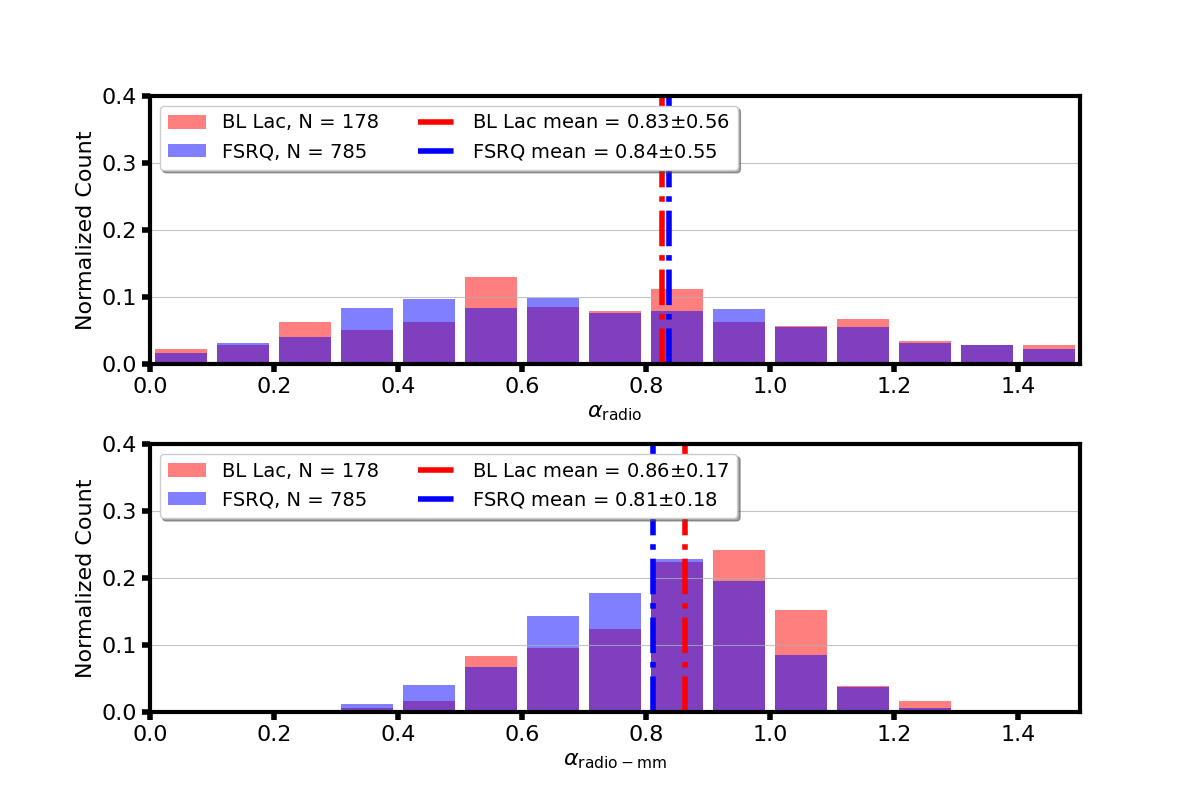

In [12]:
### For ASROC Annual Meeting use
#######################################################################################################
### BL Lac and QSO radio and radio*mm spectral index distribution 
#######################################################################################################
### Radio-mm Spectral Index
BL_Lac = np.hstack([np.array(alphaK[classclassify[1]]), np.array(alphaK[classclassify[2]]), np.array(alphaK[classclassify[4]])])
BL_Lac = BL_Lac[~np.isnan(BL_Lac)]
QSO = np.array(alphaK[classclassify[3]])
QSO = QSO[~np.isnan(QSO)]

sta_ks, p_ks = stats.ks_2samp(BL_Lac, QSO)
sta_t, p_t = t_test(BL_Lac, QSO)
sta_f, p_f = f_test(BL_Lac, QSO)

BL_Lac_med = np.median(BL_Lac)
QSO_med = np.median(QSO)
BL_Lac_mean = np.mean(BL_Lac)
QSO_mean = np.mean(QSO)

#######################################################################################################
### Radio Spectral Index
BL_Lac_Rad = np.hstack([np.array(alphaRadK[classclassify[1]]), np.array(alphaRadK[classclassify[2]]), np.array(alphaRadK[classclassify[4]])])
BL_Lac_Rad = BL_Lac_Rad[~np.isnan(BL_Lac_Rad)]

QSO_Rad = np.array(alphaRadK[classclassify[3]])
QSO_Rad = QSO_Rad[~np.isnan(QSO_Rad)]

sta_ks, p_ks = stats.ks_2samp(BL_Lac_Rad, QSO_Rad)
sta_t, p_t = t_test(BL_Lac_Rad, QSO_Rad)
sta_f, p_f = f_test(BL_Lac_Rad, QSO_Rad)

BL_Lac_Rad_med = np.median(BL_Lac_Rad)
QSO_Rad_med = np.median(QSO_Rad)
BL_Lac_Rad_mean = np.mean(BL_Lac_Rad)
QSO_Rad_mean = np.mean(QSO_Rad)

#######################################################################################################
### Plot
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['axes.linewidth'] = 3
plt.rc('font', size = 16)    
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 4
fig = plt.figure()
gs = fig.add_gridspec(2, 1, hspace = 0.3)
axs = gs.subplots() 

### radio spectral index
n, bins, p = axs[0].hist(BL_Lac_Rad, bins = np.arange(-2, max(BL_Lac_Rad) +0.1, 0.1), density = 1,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = 'BL Lac, N = '+str(len(BL_Lac)))
for item in p:
    item.set_height(item.get_height()/sum(n)) 
n, bins, p = axs[0].hist(QSO_Rad, bins = np.arange(-2, max(QSO_Rad) +0.1, 0.1), density = 1,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = 'FSRQ, N = '+str(len(QSO)))
for item in p:
    item.set_height(item.get_height()/sum(n)) 
    
#axs[0].axvline(BL_Lac_Rad_med, color = 'red', linestyle = 'dashed', linewidth = 2, label = 'BL_Lac median = %4.2f' %(BL_Lac_Rad_med))
axs[0].axvline(BL_Lac_Rad_mean, color = 'red', linestyle = '-.', linewidth = 4, label = 'BL Lac mean = %4.2f$\pm$%4.2f' %(BL_Lac_Rad_mean, np.std(BL_Lac_Rad)))
#axs[0].axvline(QSO_Rad_med, color = 'blue', linestyle = 'dashed', linewidth = 2, label = 'QSO median = %4.2f' %(QSO_Rad_med))
axs[0].axvline(QSO_Rad_mean, color = 'blue', linestyle = '-.', linewidth = 4, label = 'FSRQ mean = %4.2f$\pm$%4.2f' %(QSO_Rad_mean, np.std(QSO_Rad)))

axs[0].set_xlabel('$\\alpha_\mathrm{radio}$',  fontsize = 16)
axs[0].set_xlim (0., 1.5)
axs[0].set_ylim (0, 0.4)
axs[0].grid(axis = 'y', alpha = 0.75)
axs[0].legend(loc = 'upper left', ncol = 2, shadow = True,  fontsize = 14, markerscale = 1) 
    
### radio-mm spectral index
n, bins, p = axs[1].hist(BL_Lac, bins = np.arange(-2, max(BL_Lac) +0.1, 0.1), density = 1,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = 'BL Lac, N = '+str(len(BL_Lac)))
for item in p:
    item.set_height(item.get_height()/sum(n)) 
n, bins, p = axs[1].hist(QSO, bins = np.arange(-2, max(QSO) +0.1, 0.1), density = 1,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = 'FSRQ, N = '+str(len(QSO)))
for item in p:
    item.set_height(item.get_height()/sum(n)) 
    
#axs[1].axvline(BL_Lac_med, color = 'red', linestyle = 'dashed', linewidth = 2, label = 'BL_Lac median = %4.2f' %(BL_Lac_med))
axs[1].axvline(BL_Lac_mean, color = 'red', linestyle = '-.', linewidth = 4, label = 'BL Lac mean = %4.2f$\pm$%4.2f' %(BL_Lac_mean, np.std(BL_Lac)))
#axs[1].axvline(QSO_med, color = 'blue', linestyle = 'dashed', linewidth = 2, label = 'QSO median = %4.2f' %(QSO_med))
axs[1].axvline(QSO_mean, color = 'blue', linestyle = '-.', linewidth = 4, label = 'FSRQ mean = %4.2f$\pm$%4.2f' %(QSO_mean, np.std(QSO)))

axs[1].set_xlabel('$\\alpha_\mathrm{radio-mm}$',  fontsize = 16)
axs[1].set_xlim (0., 1.5)
axs[1].set_ylim (0, 0.4)
axs[1].grid(axis = 'y', alpha = 0.75)
axs[1].legend(loc = 'upper left', ncol = 2, shadow = True,  fontsize = 14, markerscale = 1) 

for ax in axs.flat:
    ax.set( ylabel = 'Normalized Count')
            
#for ax in axs.flat:
#    ax.label_outer()


/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_56252/1114085677.py:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alpK_QSO_lt15 = alphaK[below1_5]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_56252/1114085677.py:13: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alpK_QSO_gt15 = alphaK[greater1_5]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_56252/1114085677.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alpRadK_QSO_lt15 = alphaRadK[below1_5]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_56252/1114085677.py:19: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alpRadK_QSO_gt15 = alphaRadK[greater1_5]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_5

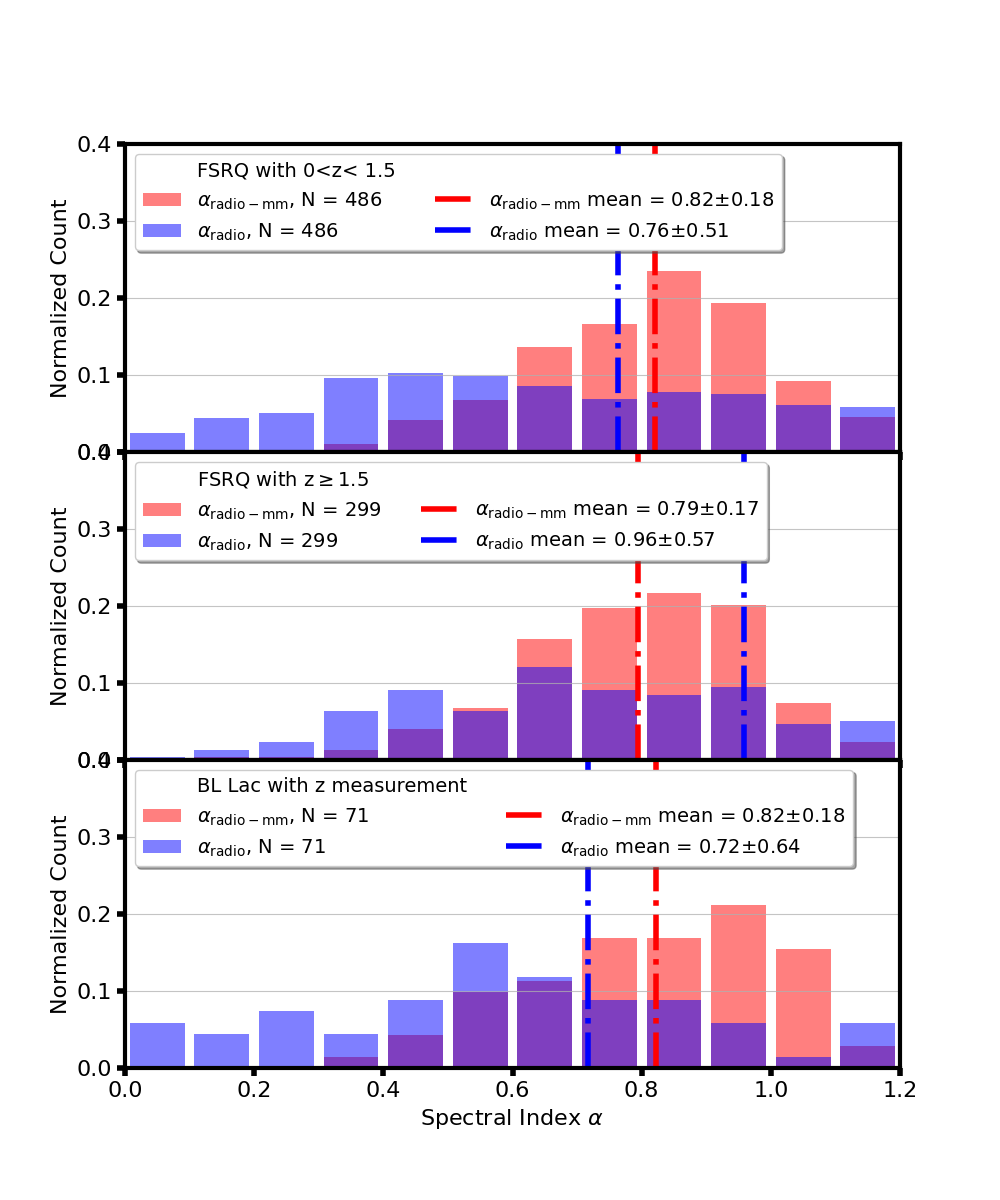

In [13]:
### For ASROC Annual Meeting use
#######################################################################################################
### Seperate QSO spectral index with z greater or lower than 1.5 (after K-correction)
#######################################################################################################

### separate redshift into low and high
below1_5 = set(classclassify[3]) & set(zsep[3])  # classclassify[3] = QSO, zsep[3] = 0 < z < 1.5
greater1_5 = set(classclassify[3]) & set(zsep[4])  # zsep[3] = z >= 1.5

# QSO rario-mm spectral index
alpK_QSO_lt15 = alphaK[below1_5]
alpK_QSO_lt15 = alpK_QSO_lt15[~np.isnan(alpK_QSO_lt15)]
alpK_QSO_gt15 = alphaK[greater1_5]
alpK_QSO_gt15 = alpK_QSO_gt15[~np.isnan(alpK_QSO_gt15)]

# QSO rario spectral index
alpRadK_QSO_lt15 = alphaRadK[below1_5]
alpRadK_QSO_lt15 = alpRadK_QSO_lt15[~np.isnan(alpRadK_QSO_lt15)]
alpRadK_QSO_gt15 = alphaRadK[greater1_5]
alpRadK_QSO_gt15 = alpRadK_QSO_gt15[~np.isnan(alpRadK_QSO_gt15)]

# statistical test (radio and radio-mm spectral index of QSO)
sta_ks1, p_ks1 = stats.ks_2samp(alpK_QSO_lt15, alpRadK_QSO_lt15)
sta_t2, p_t2 = t_test(alpK_QSO_lt15, alpRadK_QSO_lt15)
sta_f2, p_f2 = f_test(alpK_QSO_lt15, alpRadK_QSO_lt15)

sta_ks2, p_ks2 = stats.ks_2samp(alpK_QSO_gt15, alpRadK_QSO_gt15)
sta_t2, p_t2 = t_test(alpK_QSO_gt15, alpRadK_QSO_gt15)
sta_f2, p_f2 = f_test(alpK_QSO_gt15, alpRadK_QSO_gt15)

# Seperate BL Lac spectral index with z > 0 (after K-correction)
BL_Lac_z = np.where((0 < z) & (z < 1.8))[0]
BL_Lac_gt0 = set(np.hstack([ classclassify[1], classclassify[2], classclassify[4] ])) & set(BL_Lac_z)

# BL Lac radio-mm spectral index
alpK_BL_Lac = alphaK[BL_Lac_gt0]
alpK_BL_Lac = alpK_BL_Lac[~np.isnan(alpK_BL_Lac)]
    
# BL Lac radio spectral index
alpRadK_BL_Lac = alphaRadK[BL_Lac_gt0]
alpRadK_BL_Lac = alpRadK_BL_Lac[~np.isnan(alpRadK_BL_Lac)]

# statistical test (radio and radio-mm spectral index of BL Lac and low z QSO)
sta_ks3, p_ks3 = stats.ks_2samp(alpK_BL_Lac, alpK_QSO_lt15)
sta_t3, p_t3 = t_test(alpK_BL_Lac, alpK_QSO_lt15)
sta_f3, p_f3 = f_test(alpK_BL_Lac, alpK_QSO_lt15)

sta_ks4, p_ks4 = stats.ks_2samp(alpRadK_BL_Lac, alpRadK_QSO_lt15)
sta_t4, p_t4 = t_test(alpRadK_BL_Lac, alpRadK_QSO_lt15)
sta_f4, p_f4 = f_test(alpRadK_BL_Lac, alpRadK_QSO_lt15)

### Plot
plt.rcParams['figure.figsize'] = [10, 12]
plt.rcParams['axes.linewidth'] = 3
plt.rc('font', size = 16)    
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 4
fig = plt.figure()
gs = fig.add_gridspec(3, 1, hspace = 0)
axs = gs.subplots() 
    
# figure 1
axs[0].plot([], [], ' ', label = "FSRQ with 0<z< 1.5")
n1, bins, p = axs[0].hist(alpK_QSO_lt15, bins = np.arange(0., max(alpK_QSO_lt15) +0.1, 0.1), density = 1,
                            color = 'red', alpha = 0.5, rwidth=0.85, label = '$\\alpha_\mathrm{radio-mm}$, N = '+str(len(alpK_QSO_lt15)))
for item in p:
        item.set_height(item.get_height()/sum(n1))
n2, bins, p = axs[0].hist(alpRadK_QSO_lt15, bins = np.arange(0., max(alpRadK_QSO_lt15) +0.1, 0.1), density = 1,
                          color = 'blue', alpha = 0.5, rwidth=0.85, label = '$\\alpha_\mathrm{radio}$, N = '+str(len(alpRadK_QSO_lt15)))
for item in p:
        item.set_height(item.get_height()/sum(n2))

axs[0].plot([], [], ' ', label = " ")
#axs[0].axvline(np.median(alpK_QSO_lt15), color = 'red', linestyle = 'dashed', linewidth = 2, label =  '$\\alpha_\mathrm{radio-mm}$ median = %4.2f' % np.median(alpK_QSO_lt15))
axs[0].axvline(np.mean(alpK_QSO_lt15), color = 'red', linestyle = '-.', linewidth = 4, label =  '$\\alpha_\mathrm{radio-mm}$ mean = %4.2f$\pm$%4.2f' %(np.mean(alpK_QSO_lt15), np.std(alpK_QSO_lt15)))
#axs[0].axvline(np.median(alpRadK_QSO_lt15), color = 'blue', linestyle = 'dashed', linewidth = 2, label = '$\\alpha_\mathrm{radio}$ median = %4.2f' % np.median(alpRadK_QSO_lt15))
axs[0].axvline(np.mean(alpRadK_QSO_lt15), color = 'blue', linestyle = '-.', linewidth = 4, label = '$\\alpha_\mathrm{radio}$ mean = %4.2f$\pm$%4.2f' %(np.mean(alpRadK_QSO_lt15), np.std(alpRadK_QSO_lt15)))

axs[0].set_xlim (0., 1.2)
axs[0].set_ylim (0, 0.4)
axs[0].grid(axis = 'y', alpha = 0.75)
axs[0].legend(loc = 'upper left', ncol = 2, shadow = True,  fontsize = 14, markerscale = 1) 

# figure 2
axs[1].plot([], [], ' ', label = "FSRQ with z$\geq$1.5")
n1, bins, p = axs[1].hist(alpK_QSO_gt15, bins = np.arange(0., max(alpK_QSO_gt15) +0.1, 0.1), density = 1,
                          color = 'red', alpha = 0.5, rwidth=0.85, label = '$\\alpha_\mathrm{radio-mm}$, N = '+str(len(alpK_QSO_gt15)) )
for item in p:
        item.set_height(item.get_height()/sum(n1))
n2, bins, p = axs[1].hist(alpRadK_QSO_gt15, bins = np.arange(0., max(alpRadK_QSO_gt15) +0.1, 0.1), density = 1,
                          color = 'blue', alpha = 0.5, rwidth=0.85, label = '$\\alpha_\mathrm{radio}$, N = '+str(len(alpRadK_QSO_gt15)) )
for item in p:
        item.set_height(item.get_height()/sum(n2))
        
axs[1].plot([], [], ' ', label = " ")
#axs[1].axvline(np.median(alpK_QSO_gt15), color = 'red', linestyle = 'dashed', linewidth = 2, label = '$\\alpha_\mathrm{radio-mm}$ median = %4.2f' % np.median(alpK_QSO_gt15))
axs[1].axvline(np.mean(alpK_QSO_gt15), color = 'red', linestyle = '-.', linewidth = 4, label = '$\\alpha_\mathrm{radio-mm}$ mean = %4.2f$\pm$%4.2f' %(np.mean(alpK_QSO_gt15), np.std(alpK_QSO_gt15)))
#axs[1].axvline(np.median(alpRadK_QSO_gt15), color = 'blue', linestyle = 'dashed', linewidth = 2, label = '$\\alpha_\mathrm{radio}$ median = %4.2f' % np.median(alpRadK_QSO_gt15))
axs[1].axvline(np.mean(alpRadK_QSO_gt15), color = 'blue', linestyle = '-.', linewidth = 4, label = '$\\alpha_\mathrm{radio}$ mean = %4.2f$\pm$%4.2f' %(np.mean(alpRadK_QSO_gt15), np.std(alpRadK_QSO_gt15)))

axs[1].set_xlim (0.0, 1.2)
axs[1].set_ylim (0, 0.4)
axs[1].grid(axis = 'y', alpha = 0.75)
axs[1].legend(loc = 'upper left', ncol = 2, shadow = True,  fontsize = 14, markerscale = 1) 

# figure 3
axs[2].plot([], [], ' ', label = "BL Lac with z measurement")
n1, bins, p = axs[2].hist(alpK_BL_Lac, bins = np.arange(0., max(alpK_BL_Lac)+0.1, 0.1), density = 1,
                          color = 'red', alpha = 0.5, rwidth=0.85, label = '$\\alpha_\mathrm{radio-mm}$, N = '+str(len(alpK_BL_Lac)) )
for item in p:
        item.set_height(item.get_height()/sum(n1))
        
n2, bins, p = axs[2].hist(alpRadK_BL_Lac, bins = np.arange(0., max(alpRadK_BL_Lac)+0.1, 0.1), density = 1,
                          color = 'blue', alpha = 0.5, rwidth=0.85, label = '$\\alpha_\mathrm{radio}$, N = '+str(len(alpRadK_BL_Lac)) )
for item in p:
        item.set_height(item.get_height()/sum(n2))
        
axs[2].plot([], [], ' ', label = " ")
#axs[2].axvline(np.median(alpK_BL_Lac), color = 'red', linestyle = 'dashed', linewidth = 2, label = '$\\alpha_\mathrm{radio-mm}$ median = %4.2f' % np.median(alpK_BL_Lac))
axs[2].axvline(np.mean(alpK_BL_Lac), color = 'red', linestyle = '-.', linewidth = 4, label = '$\\alpha_\mathrm{radio-mm}$ mean = %4.2f$\pm$%4.2f' %(np.mean(alpK_BL_Lac), np.std(alpK_BL_Lac)))
#axs[2].axvline(np.median(alpRadK_BL_Lac), color = 'blue', linestyle = 'dashed', linewidth = 2, label = '$\\alpha_\mathrm{radio}$ median = %4.2f' % np.median(alpRadK_BL_Lac))
axs[2].axvline(np.mean(alpRadK_BL_Lac), color = 'blue', linestyle = '-.', linewidth = 4, label = '$\\alpha_\mathrm{radio}$ mean = %4.2f$\pm$%4.2f' %(np.mean(alpRadK_BL_Lac), np.std(alpRadK_BL_Lac)))

axs[2].set_xlim (0., 1.2)
axs[2].set_ylim (0, 0.4)
axs[2].grid(axis = 'y', alpha = 0.75)
axs[2].legend(loc = 'upper left', ncol = 2, shadow = True, fontsize = 14, markerscale = 1) 

for ax in axs.flat:
    ax.set(xlabel = 'Spectral Index $\\alpha$', ylabel = 'Normalized Count')
            
for ax in axs.flat:
    ax.label_outer()
    
#figurename = 'Spectral index (K-corrected) Distributoion of BL Lac and QSO'
#plt.suptitle(figurename, fontsize = 18)

In [14]:

### statistical test of low and high z QSO radio spectral index
# K-S test
KS_sta, KS_p = stats.ks_2samp(alpRadK_QSO_lt15, alpRadK_QSO_gt15)
print('statistical test of low and high z QSO radio spectral index')
print('K-S test sta = ', KS_sta, ', p = ', KS_p)

# F-test
F_sta, F_p = f_test(alpRadK_QSO_lt15, alpRadK_QSO_gt15)
print('F test sta = ', F_sta, ', p = ', F_p)

# T-test
T_sta, T_p = t_test(alpRadK_QSO_lt15, alpRadK_QSO_gt15)
print('T test sta = ', T_sta, ', p = ', T_p)
print('=================================================')

### statistical test of low and high z QSO radio-mm spectral index
# K-S test
KS_sta, KS_p = stats.ks_2samp(alpK_QSO_lt15, alpK_QSO_gt15)
print('statistical test of low and high z QSO radio-mm spectral index')
print('K-S test sta = ', KS_sta, ', p = ', KS_p)

# F-test
F_sta, F_p = f_test(alpK_QSO_lt15, alpK_QSO_gt15)
print('F test sta = ', F_sta, ', p = ', F_p)

# T-test
T_sta, T_p = t_test(alpK_QSO_lt15, alpK_QSO_gt15)
print('T test sta = ', T_sta, ', p = ', T_p)
print('=================================================')

### statistical test of BL Lac and low z QSO radio spectral index
KS_sta, KS_p = stats.ks_2samp(alpRadK_BL_Lac, alpRadK_QSO_lt15)
print('statistical test of BL Lac and low z QSO radio spectral index')
print('K-S test sta = ', KS_sta, ', p = ', KS_p)

F_sta,F_p = t_test(alpRadK_BL_Lac, alpRadK_QSO_lt15)
print('F test sta = ', F_sta, ', p = ', F_p)

T_sta, T_p = f_test(alpRadK_BL_Lac, alpRadK_QSO_lt15)
print('T test sta = ', T_sta, ', p = ', T_p)
print('=================================================')

### statistical test of BL Lac and low z QSO radio-mm spectral index
KS_sta, KS_p = stats.ks_2samp(alpK_BL_Lac, alpK_QSO_lt15)
print('statistical test of BL Lac and low z QSO radio-mm spectral index')
print('K-S test sta = ', KS_sta, ', p = ', KS_p)

F_sta, F_p = t_test(alpK_BL_Lac, alpK_QSO_lt15)
print('F test sta = ', F_sta, ', p = ', F_p)

T_sta, T_p = f_test(alpK_BL_Lac, alpK_QSO_lt15)
print('T test sta = ', T_sta, ', p = ', T_p)



statistical test of low and high z QSO radio spectral index
K-S test sta =  0.17380981873735496 , p =  2.2707651560895476e-05
F test sta =  0.8059681508479637 , p =  0.9911480466284909
T test sta =  -4.932534582782015 , p =  9.916364106015434e-07
statistical test of low and high z QSO radio-mm spectral index
K-S test sta =  0.13106789435291852 , p =  0.003060388800951163
F test sta =  1.1514613213026017 , p =  0.0603897863012447
T test sta =  2.0312907060577685 , p =  0.04256280520853195
statistical test of BL Lac and low z QSO radio spectral index
K-S test sta =  0.13948298846577406 , p =  0.16176296510999474
F test sta =  -0.669960985696615 , p =  0.5031613049933856
T test sta =  1.5675034774982806 , p =  0.031030878359329717
statistical test of BL Lac and low z QSO radio-mm spectral index
K-S test sta =  0.08131919086535674 , p =  0.7726862922477046
F test sta =  0.07763156715506583 , p =  0.938149109906921
T test sta =  0.9784052575669863 , p =  0.5362539002296935


In [15]:
#######################################################################################################
### Radio Spectral Index
BL_Lac_Rad = np.hstack([np.array(alphaRadK[classclassify[1]]), np.array(alphaRadK[classclassify[2]]), np.array(alphaRadK[classclassify[4]])])
BL_Lac_Rad = BL_Lac_Rad[~np.isnan(BL_Lac_Rad)]

QSO_Rad = np.array(alphaRadK[classclassify[3]])
QSO_Rad = QSO_Rad[~np.isnan(QSO_Rad)]

sta_ks, p_ks = stats.ks_2samp(BL_Lac_Rad, QSO_Rad)
sta_t, p_t = t_test(BL_Lac_Rad, QSO_Rad)
sta_f, p_f = f_test(BL_Lac_Rad, QSO_Rad)

BL_Lac_Rad_med = np.median(BL_Lac_Rad)
QSO_Rad_med = np.median(QSO_Rad)
BL_Lac_Rad_mean = np.mean(BL_Lac_Rad)

In [16]:
QSO_Rad_mean

0.8369449171974522

In [17]:
### separate redshift into low and high
below1_5 = set(classclassify[3]) & set(zsep[3])  # classclassify[3] = QSO, zsep[3] = 0 < z < 1.5
greater1_5 = set(classclassify[3]) & set(zsep[4])  # zsep[3] = z >= 1.5

# QSO rario-mm spectral index
alpK_QSO_lt15 = alphaK[below1_5]
alpK_QSO_lt15 = alpK_QSO_lt15[~np.isnan(alpK_QSO_lt15)]
alpK_QSO_gt15 = alphaK[greater1_5]
alpK_QSO_gt15 = alpK_QSO_gt15[~np.isnan(alpK_QSO_gt15)]

# QSO rario spectral index
alpRadK_QSO_lt15 = alphaRadK[below1_5]
alpRadK_QSO_lt15 = alpRadK_QSO_lt15[~np.isnan(alpRadK_QSO_lt15)]
alpRadK_QSO_gt15 = alphaRadK[greater1_5]
alpRadK_QSO_gt15 = alpRadK_QSO_gt15[~np.isnan(alpRadK_QSO_gt15)]

/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_56252/2039908434.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alpK_QSO_lt15 = alphaK[below1_5]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_56252/2039908434.py:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alpK_QSO_gt15 = alphaK[greater1_5]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_56252/2039908434.py:12: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alpRadK_QSO_lt15 = alphaRadK[below1_5]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_56252/2039908434.py:14: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alpRadK_QSO_gt15 = alphaRadK[greater1_5]
